<font color='green'><b> Код обсчитывается долго! Примерно 30 минут! </b></font>

#### _Проект № 9_

# Коэффициент восстановления золота из руды.


<a id="content"> </a>

## Оглавление

  0. [Введение. Описание проекта.](#step0)
  1. [Загрузка и подготовка данныx.](#step1) 
      - 1.1. [Загрузка данных](#step1_1) 
      - 1.2. [Проверка расчета эффективности обогащения](#step1_2) 
      - 1.3. [Анализ признаков, недоступных в тестовой выборке](#step1_3)
      - 1.4. [Предобработка данных](#step1_4) 
  
  
  2. [Анализ данных](#step2) 
      - 2.1. [Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки](#step2_1)
      - 2.2. [Сравнение размера гранул на обучающей и тестовой выборках](#step2_2)
      - 2.3. [Исследование суммарной концентрации всех веществ на разных стадиях](#step2_3)
      
            
  3. [Построение модели](#step3) 
      - 3.1. [Функция для вычисления sMAPE](#step3_1)
      - 3.2. [Обучение моделей](#step3_2)
      - 3.3. [Выбор лучшей модели и проверка её на тестовой выборке](#step3_3)
      
      
  4. [Выводы](#step4) 
        


<a id='step0'> </a>
## Описание проекта

##### Необходимо подготовить прототип модели машинного обучения.  

##### Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. 

В нашем распоряжении данные с параметрами добычи и очистки золота. 


### Технологический процесс.

1) Добытая порода проходит стадию первичной обработки - __дробление__, измельчение

2) Дробленая мелкодисперсная порода смешивается с водой, образуя пульпу.

3) Пульпа отправляется на __флотацию__. При флотации тонкодисперсное сырье в смеси с водой и специальными веществами, подвергается интенсивному вспениванию. В результате металлические элементы прикрепляются к  пузырькам воздуха и всплывают,  отходы оседают на дно. 

4) После флотации получается __черновой концентрат__  и __"отвальные хвосты"__, то есть остатки породы с низкой концентрацией полезных металлов.

5) Черновой концентрат проходит __две стадии очистки__. На выходе получается __финальный концентрат__ и __новые отвальные хвосты__.




##### Необходимо:

1. **Подготовить данные**;
  - В том числе проверить, что эффективность обогащения рассчитана правильно.
  - Вычислить эффективность обогащения на обучающей выборке для признака rougher.output.recovery. Найти МАЕ между нашими расчётами и значением признака в данных.
  - Проанализировать признаки, недоступные в тестовой выборке.
  
  
2. **Провести исследовательский анализ данных**;
  - Посмотреть как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.
  - Сравнить распределение размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели может быть неправильной.
  - Исследовать суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах
  
  
3. **Построить и обучить модель**.
  - Написать функцию для вычисления итоговой метрики sMAPE
  - Обучить разные модели и оценить их качество кросс-валидацией


##### Формула эффективности обогащения:
$$
Recovery = \frac{C*(F-T)}{F*(C-T)} * 100\% 
$$(1)
- C - доля золота в концентрате после флотации/очистки;
- F - доля золота в сырье/концентрате до флотации/очистки;
- T - доля золота в отвальных хвостах после влотации/очистки.
Для прогноза коэффициента нужно найти долю золота в концентратах и хвостах. Причем важен не только финальный продукт, но и черновой концентрат



##### Метрика качества
**sMape** (_Symmetric Mean Absolute Percentage Error_) - Симметричное среднее абсолютное процентное отклонение.

$$
sMape = \frac{1}{N} \sum_{i=1}^N {\frac{|y_i - \hat{y}_i|}
                                       {\frac{|y_i| + |\hat{y}_i|}
                                             {2}
                                        }*100\%}
$$(2)

- $y_i$ - Значение целевого признака для объекта с порядковым номером i в выборке, на которой измеряется качество.
- $\hat y_i$ - значение предсказания для объекта с порядковым номером i, например, в тестовой выборке
- $N$ - количество объектов в выборке


##### Итоговая метрика.
$$
sMAPE_{itog} = 25\% * sMape(rougher) + 75\% * sMape(final)
$$(3)

- **sMape(rougher)** - эффективность обогащения **чернового** концентрата rougher.output.recovery.

- **sMape(final)** - эффективность обогащения **финального** концентрата final.output.recovery.


[В оглавление](#content)

<a id="step1"> </a>
<a id="input"> </a>

# 1. Подготовка данных

   - 1.1. [Загрузка данных](#step1_1) 
   - 1.2. [Проверка расчета эффективности обогащения](#step1_2) 
   - 1.3. [Анализ признаков, недоступных в тестовой выборке](#step1_3)
   - 1.4. [Предобработка данных](#step1_4) 

In [1]:
# Подключим библиотеки:
import pandas as pd
import numpy as np

# Визуализация таблиц и графиков:
from IPython.display import display
pd.options.display.max_columns = 100
pd.set_option('display.max_rows', 100)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Подключим индикатор выполнения:
from tqdm.notebook import tqdm


# Из библиотеки scipy нам понадобится рапределение Стьюдента
# для вычисления доверительного интервала.
#from scipy import stats as st
from numpy.random import RandomState

# Поиск по сетке - используем для любопытства.
from sklearn.model_selection import GridSearchCV, cross_val_score
#from sklearn.model_selection import RandomizedSearchCV

#from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.preprocessing import StandardScaler
# Вычисление метрик предсказаний моделей:
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
#from sklearn.metrics.scorer import make_scorer


# игнорирование предупреждений
import warnings
warnings.filterwarnings('ignore')
import time
start1 = time.time()

<a id="step1_1"> </a>
### 1.1. Загрузка данных

### Описние данных.

- *gold_recovery_train.csv* - обучающая выборка
- *gold_recovery_test.csv* - тестовая выборка
- *gold_recovery_full.csv* - исходные данные (содержат обучающую и тестовую выборки со всеи признаками)


- Данные индексируются датой и временем получения информации. Соседние по времени параметры часто похожи.
- Некоторые параметры недоступны, потому что замеряются или рассчитываются значительно позже. Из-за этого в тестовой выборке отсутствуют некоторые признаки, которые могут быть в обучающей.



##### Технологический процесс
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant 
- Xanthate — ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота

##### Параметры этапов
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

##### Наименование признаков
Наименование признаков должно быть такое:\
[этап].[тип_параметра].[название_параметра]

Пример: \
`rougher.input.feed_ag`

##### Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

##### Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики



In [2]:
train = pd.read_csv('gold_recovery_train.csv')
test = pd.read_csv('gold_recovery_test.csv')
full = pd.read_csv('gold_recovery_full.csv')

При первом просмотре данных оказалось, что даты в них находятся в формте `object`\
Сразу изменим формат дат (чтобы не загромождать проект двойным просмотром длинных таблиц.)

##### Обучающая выборка `train`

In [3]:
train['date'] = pd.to_datetime(train['date'], format='%Y-%m-%d %H:%M:%S')

print(train.info())
display(train.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                16860 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         16788 non-null  float64       
 2   final.output.concentrate_pb                         16788 non-null  float64       
 3   final.output.concentrate_sol                        16490 non-null  float64       
 4   final.output.concentrate_au                         16789 non-null  float64       
 5   final.output.recovery                               15339 non-null  float64       
 6   final.output.tail_ag                                16794 non-null  float64       
 7   final.output.tail_pb                                16677 non-null  float64       
 8   final.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

##### Тестовая выборка `test`

In [4]:
test['date'] = pd.to_datetime(test['date'], format='%Y-%m-%d %H:%M:%S')
print(test.info())
display(test.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5856 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5554 non-null   float64       
 2   primary_cleaner.input.depressant            5572 non-null   float64       
 3   primary_cleaner.input.feed_size             5856 non-null   float64       
 4   primary_cleaner.input.xanthate              5690 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64       
 9   primary_

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.515277,5.803657,1000.276604,-350.172597,1251.322675,-398.655289,1250.493702,-399.746728,1199.398691,-397.50

##### Исходные данные `full`

In [5]:
full['date'] = pd.to_datetime(full['date'], format='%Y-%m-%d %H:%M:%S')
print(full.info())
display(full.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                22716 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         22627 non-null  float64       
 2   final.output.concentrate_pb                         22629 non-null  float64       
 3   final.output.concentrate_sol                        22331 non-null  float64       
 4   final.output.concentrate_au                         22630 non-null  float64       
 5   final.output.recovery                               20753 non-null  float64       
 6   final.output.tail_ag                                22633 non-null  float64       
 7   final.output.tail_pb                                22516 non-null  float64       
 8   final.

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,10.296251,7.25,1.002663,8.558743,10.

In [6]:
print('Дубликатов в train:', train.duplicated().sum())
print('Дубликатов в test:', test.duplicated().sum())
print('Дубликатов в full:', full.duplicated().sum())

Дубликатов в train: 0
Дубликатов в test: 0
Дубликатов в full: 0


Очень много признаков! 87 колонок данных.
Данные о концентрациях есть не только по золоту, но и по серебру, свинцу и по загадочному параметру sol.

[В оглавление](#content)

<a id="step1_2"> </a>
### 1.2. Проверка расчета эффективности обогащения

По условию задачи, необходимо проверить правильность расчитанной эффективности обогащения на примере признака rouger.output.recovery.\
Надо расчитать recovery Au на выходе из флотации и найти MAE между нашими расчетами и значениями признака в данных обучающей выборки.

In [7]:
# в большой таблице сложно ориентироваться.
# создадим таблицу для расчета и проверки эффективности обогащения
rougher_recoverys = train.loc[:,['rougher.output.concentrate_au', 'rougher.input.feed_au', 
                                 'rougher.output.tail_au', 'primary_cleaner.output.concentrate_au', 
                                 'final.output.concentrate_au', 'final.output.tail_au', 
                                 'rougher.output.recovery', 'final.output.recovery']]
rougher_recoverys.head()

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,final.output.tail_au,rougher.output.recovery,final.output.recovery
0,19.793808,6.486150,1.170244,34.174427,42.192020,2.143149,87.107763,70.541216
1,20.050975,6.478583,1.184827,34.118526,42.701629,2.224930,86.843261,69.266198
2,19.737170,6.362222,1.162562,33.969464,42.657501,2.257889,86.842308,68.116445
3,19.320810,6.118189,1.079755,28.260743,42.689819,2.146849,87.226430,68.347543
4,19.216101,5.663707,1.012642,33.044932,42.774141,2.055292,86.688794,66.927016


In [8]:
# Расчет эффетивности обогащения Au на этапе флотации
c1 = rougher_recoverys['rougher.output.concentrate_au']
f1 = rougher_recoverys['rougher.input.feed_au']
t1 = rougher_recoverys['rougher.output.tail_au']

# Заодно расчет финальной recovery
c2 = rougher_recoverys['final.output.concentrate_au']
f2 = rougher_recoverys['rougher.input.feed_au']
t2 = rougher_recoverys['final.output.tail_au']
rougher_recoverys['rougher.recovery_control'] = c1 * (f1 - t1) * 100 / (f1 * (c1 - t1))
rougher_recoverys['final.recovery_control'] = c2 * (f2 - t2) * 100 / (f2 * (c2 - t2))

# Разность расчитанной нами эффективности, и предоставленной с данными
rougher_recoverys['rougher.recovery_deviat'] = abs(rougher_recoverys['rougher.recovery_control'] - 
                                          rougher_recoverys['rougher.output.recovery'])
rougher_recoverys['final.recovery_deviat'] = abs(rougher_recoverys['final.recovery_control'] - 
                                          rougher_recoverys['final.output.recovery'])
rougher_recoverys.head(15)

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,final.output.tail_au,rougher.output.recovery,final.output.recovery,rougher.recovery_control,final.recovery_control,rougher.recovery_deviat,final.recovery_deviat
0,19.793808,6.486150,1.170244,34.174427,42.192020,2.143149,87.107763,70.541216,87.107763,70.541216,0.000000e+00,0.000000e+00
1,20.050975,6.478583,1.184827,34.118526,42.701629,2.224930,86.843261,69.266198,86.843261,69.266198,1.421085e-14,0.000000e+00
2,19.737170,6.362222,1.162562,33.969464,42.657501,2.257889,86.842308,68.116445,86.842308,68.116445,2.842171e-14,2.842171e-14
3,19.320810,6.118189,1.079755,28.260743,42.689819,2.146849,87.226430,68.347543,87.226430,68.347543,0.000000e+00,1.421085e-14
4,19.216101,5.663707,1.012642,33.044932,42.774141,2.055292,86.688794,66.927016,86.688794,66.927016,0.000000e+00,1.421085e-14
5,18.950385,5.687168,0.915835,32.070664,41.633678,1.918586,88.156912,69.465816,88.156912,69.465816,2.842171e-14,1.421085e-14
6,19.319591,6.038436,0.986248,33.184823,41.995316,2.058913,88.168065,69.300835,88.168065,69.300835,1.421085e-14,0.000000e+00
7,19.507897,6.433854,1.116110,34.027719,42.452727,2.143437,87.668336,70.230976,87.668336,70.230976,1.421085e-14,0.000000e+00
8,19.789465,6.526612,1.186780,34.964974,43.404078,2.209881,87.035862,69.688595,87.035862,69.688595,1.421085e-14,1.421085e-14
9,19.497669,6.633002,1.167140,34.826500,43.235220,2.209593,87.650868,70.279619,87.650868,70.279619,0.000000e+00,0.000000e+00


In [9]:
rougher_recoverys.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   rougher.output.concentrate_au          16778 non-null  float64
 1   rougher.input.feed_au                  16777 non-null  float64
 2   rougher.output.tail_au                 14611 non-null  float64
 3   primary_cleaner.output.concentrate_au  16778 non-null  float64
 4   final.output.concentrate_au            16789 non-null  float64
 5   final.output.tail_au                   16794 non-null  float64
 6   rougher.output.recovery                14287 non-null  float64
 7   final.output.recovery                  15339 non-null  float64
 8   rougher.recovery_control               14577 non-null  float64
 9   final.recovery_control                 15582 non-null  float64
 10  rougher.recovery_deviat                14287 non-null  float64
 11  fi

В расчитанных нами recovery на 200 строк больше, чем в исходных!

##### Расчитаем  МAE между нашими расчетами и значениями признака.

In [10]:
rougher_mae = (rougher_recoverys['rougher.recovery_deviat'].sum() / 
               rougher_recoverys['rougher.recovery_deviat'].count())
print("rougher MAE=", rougher_mae)

final_mae = (rougher_recoverys['final.recovery_deviat'].sum() / 
             rougher_recoverys['final.recovery_deviat'].count())
print("final MAE=", final_mae)

rougher MAE= 1.0724115653039479e-14
final MAE= 9.04536820234419e-15


##### Посмотрим на графике, как отличается расчитанная нами recovery от предоставленной в данных.

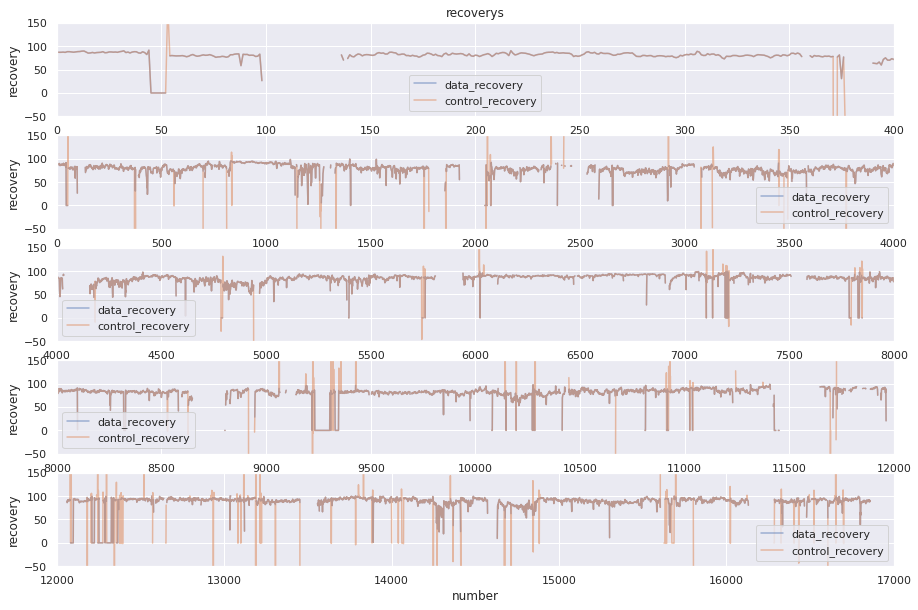

In [11]:
def recoverys(x1, x2):
    plt.xlabel('number')
    plt.ylabel('recovery')
    plt.ylim(-50, 150)
    plt.xlim(x1, x2)
    plt.plot(rougher_recoverys.index, rougher_recoverys['rougher.output.recovery'], 
             label='data_recovery', alpha=0.5)
    plt.plot(rougher_recoverys.index, rougher_recoverys['rougher.recovery_control'], 
             label='control_recovery', alpha=0.5)
    plt.legend()
    

plt.figure(figsize=(15,10))
sns.set()
plt.subplot(5, 1, 1)
plt.title('recoverys')
recoverys(0, 400)

plt.subplot(5, 1, 2)
recoverys(0, 4000)
plt.subplot(5, 1, 3)
recoverys(4000, 8000)
plt.subplot(5, 1, 4)
recoverys(8000, 12000)
plt.subplot(5, 1, 5)
recoverys(12000, 17000)


plt.show()

Порядок MAE - 1.1e-14! \
Кажется, это очень хороший показатель.\
В таблице видно, что все видимые значения совпадают до последнего отображаемого знака.\
На графиках видно, что оценки эффетивности практически везде совпадают. \
Видны отдельные выбросы значений расчитанной нами recovery. Поэтому на первой картинке изображены эффективности в увеличенном масштабе, и при этом хорошо видно, что наши выбросы хорошо соотносятся с пропусками в изначальной recovery.

In [12]:
display(rougher_recoverys.loc[(rougher_recoverys['final.output.recovery'].isnull()) & 
                             (rougher_recoverys['final.recovery_control'].notnull())].head(15))

,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au,primary_cleaner.output.concentrate_au,final.output.concentrate_au,final.output.tail_au,rougher.output.recovery,final.output.recovery,rougher.recovery_control,final.recovery_control,rougher.recovery_deviat,final.recovery_deviat
49,0.000000,0.033369,2.043403,35.865996,43.389252,3.202483,0.000000,NaN,0.000000,-1.025400e+04,0.000000e+00,NaN
372,4.642559,0.139652,2.574309,5.184108,4.304974,0.164934,NaN,NaN,-3913.312866,-1.882454e+01,NaN,NaN
375,7.789100,3.341982,2.667307,6.476057,23.704807,3.942216,30.701256,NaN,30.701256,-2.154313e+01,0.000000e+00,NaN
377,15.084039,3.501578,5.964024,15.797071,36.597453,7.723369,NaN,NaN,-116.312118,-1.528184e+02,NaN,NaN
433,18.335165,6.484205,5.397490,31.446601,35.686803,6.693746,23.751305,NaN,23.751305,-3.977653e+00,0.000000e+00,NaN
560,19.619751,1.921101,1.939904,38.011883,45.273819,2.384391,NaN,NaN,-1.086185,-2.545657e+01,NaN,NaN
812,16.561142,1.489851,2.483197,25.286893,41.625311,3.643600,NaN,NaN,-78.434804,-1.584292e+02,NaN,NaN
813,15.543751,0.255631,NaN,0.000000,38.920218,5.196571,NaN,NaN,NaN,-2.230673e+03,NaN,NaN
1140,17.158330,2.486570,NaN,0.000000,37.553521,5.018685,NaN,NaN,NaN,-1.175397e+02,NaN,NaN
1148,15.745147,0.460536,1.812582,35.874821,28.835109,2.939722,NaN,NaN,-331.774518,-5.994380e+02,NaN,NaN


Но похоже, что эти приобретенные 200 с лишним строчек нам не помогут уменьшить число пропусков в целевом признаке. Значения во вновьприобретенных recovery аномальные (отрицательные и большие по модулю).

[В оглавление](#content)

<a id="step1_3"> </a>
### 1.3. Анализ признаков, недоступных в тестовой выборке


##### Сведем информацию о файлах данных в одну табличку - для наглядности.

In [13]:
def infos_df():
    names_columns = train.columns
    train_count = []
    for i in train.columns:
        a = train[i].count()
        train_count.append(a)
    infos_df = pd.DataFrame({'names_columns':names_columns, 'train_count':train_count})
    train_isnull = pd.DataFrame(train.isnull().sum()).reset_index()
    train_isnull = train_isnull.rename(columns = {'index':'names_columns', 0:'train_isnull'})
    
    test_count = []
    for i in test.columns:
        b = test[i].count()
        test_count.append(b)
    test_df = pd.DataFrame({'names_columns':test.columns, 'test_count':test_count})
    test_isnull = pd.DataFrame(test.isnull().sum()).reset_index()
    test_isnull = test_isnull.rename(columns = {'index':'names_columns', 0:'test_isnull'})
    
    full_count = []
    for i in full.columns:
        ab = full[i].count()
        full_count.append(ab)
    full_df = pd.DataFrame({'names_columns':full.columns, 'full_count':full_count})
    full_isnull = pd.DataFrame(full.isnull().sum()).reset_index()
    full_isnull = full_isnull.rename(columns = {'index':'names_columns', 0:'full_isnull'})
    
    infos_df = infos_df.merge(train_isnull, on='names_columns', how='left')
    infos_df = infos_df.merge(test_df, on='names_columns', how='left')
    infos_df = infos_df.merge(test_isnull, on='names_columns', how='left')
    infos_df = infos_df.merge(full_df, on='names_columns', how='left')
    infos_df = infos_df.merge(full_isnull, on='names_columns', how='left')
    
    return infos_df

infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,16860,0,5856.0,0.0,22716,0
1,final.output.concentrate_ag,16788,72,NaN,NaN,22627,89
2,final.output.concentrate_pb,16788,72,NaN,NaN,22629,87
3,final.output.concentrate_sol,16490,370,NaN,NaN,22331,385
4,final.output.concentrate_au,16789,71,NaN,NaN,22630,86
5,final.output.recovery,15339,1521,NaN,NaN,20753,1963
6,final.output.tail_ag,16794,66,NaN,NaN,22633,83
7,final.output.tail_pb,16677,183,NaN,NaN,22516,200
8,final.output.tail_sol,16715,145,NaN,NaN,22445,271
9,final.output.tail_au,16794,66,NaN,NaN,22635,81


В таблицу мы вывели не только количество значений в каждом файле, но и количество пропусков.

#### Какие данные отсутствуют в test
1. Отсутствуют данные о выходных концентрациях элементов с каждого этапа обогащения породы как в выходных концентратах, так и в отвальных хвостах:
    - на этапе флотации: `rougher.output.concentrate`, `rougher.output.tail` по всем элементам
    - на этапе первичной очистки после флотации: `primary_cleaner.output.concentrate`, `primary_cleaner.output.tail`
    - на этапе второй очистки: `secondary_cleaner.output.tail`
    - Финальные концентраты: `final.output.concentrate`, `final.output.tail`
    
    _Их отсутствие вполне понятно - Это те параметры, которые будут известны только после обогащения породы._
    

2. Отсутствуют расчетные характеристики эффективности обогащения (recovery) - финальная и флотационная: `final.output.recovery`, `rougher.output.recovery`. 

    _Их отсутствие также вполне понятно - эти характеристики расчитываются с учетом концентраций элементов на разных этапах очистки, которые в этой выборке нам неизвестны. Собственно эти две характеристики нам и необходимо научиться предсказывать - это наши будущие таргеты_


3. Отсутствуют расчетные характеристики для флотации: 
    - rougher.calculation.sulfate_to_au_concentrate
    - rougher.calculation.floatbank10_sulfate_to_au_...
    - rougher.calculation.floatbank11_sulfate_to_au_...
    - rougher.calculation.au_pb_ratio (это отношение входной концентрации золота к входной концентрации свинца в сырье)
    
    _Эти расчетные характеристики, они высчитываются значительно позже обработки породы, поэтому их нет в тестовой выборке. Значит для построения модели мы их тоже не сможем использовать._


#### Какие еще есть странности в наших данных.
1. На выходе со второй очистки нам даны только концентрации хвостов. Очевидно, что полезная составляющая на выходе - финальный концентрат. Финальные же хвосты отличаются от хвостов второй очистки тем что в финале должны учитываться все хвосты, а не только со второй очистки. То есть финальные хвосты - это суммарные хвосты со всего процесса.


2. В данных много пропусков. В том числе много попусов в целевых признаках (final.output.recovery - 1521 пропуск, rougher.output.recovery - 2573 пропуска)


3. В характеристиках флотаци есть параметры входящих реагентов в floatbank11. При этом нет параметров работы самого floatbank11 (уровни жидкости, объёмы воздуха) (для сравнения, рядом есть реагенты для floatbank10, и для этой установки есть ее рабочие параметры).


4. Среди оценок концентраций элементов есть загадочный элемент sol.  Все оценки, связанные с этим элементом встречаются только во входных и выходных концентрациях (концентратов и хвостов).Все признаки, которые касаются sol полностью отсутствуют в тестовой выборке (кроме rougher.input.feed_sol).

   В задании не стоит отдельной задачи по исследованию признаков, связанных с этим загадочным элементом sol. В расчете recovery sol тоже не участвует.

   В довершении, как в описнии задачи, так и в описаниях технологии очистки золотосодержащих руд разных типов методом флотации в интернете, также не были найдены какие-либо упоминания о каком-либо элементе, даже отдаленно напоминающем сочетание sol, как имеющем важное значение для процесса флотации золота и для его результатов.


[В оглавление](#content)

<a id="step1_4"> </a>
## 1.4. Предобработка данных


In [14]:
# Похоже, нам придется много что поменять в обучающей выборке.
# Создадим на всякий случай ее нулевую копию:
train_0 = train.copy()

### Удаление столбцов.
Удалим из обучающей выборки те нецелевые признаки, которых нет в тестовой выборке.

In [15]:
train = train.drop(['final.output.concentrate_sol', 
                     'final.output.tail_sol', 
                     'primary_cleaner.output.concentrate_sol', 
                     'primary_cleaner.output.tail_sol', 
                     'rougher.output.concentrate_sol',
                     'rougher.output.tail_sol', 
                     'secondary_cleaner.output.tail_sol', 
                     'rougher.calculation.sulfate_to_au_concentrate', 
                     'rougher.calculation.floatbank10_sulfate_to_au_feed', 
                     'rougher.calculation.floatbank11_sulfate_to_au_feed', 
                     'rougher.calculation.au_pb_ratio'], axis=1)

# Обновим и посмотрим на сводную таблицу info
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,16860,0,5856.0,0.0,22716,0
1,final.output.concentrate_ag,16788,72,NaN,NaN,22627,89
2,final.output.concentrate_pb,16788,72,NaN,NaN,22629,87
3,final.output.concentrate_au,16789,71,NaN,NaN,22630,86
4,final.output.recovery,15339,1521,NaN,NaN,20753,1963
5,final.output.tail_ag,16794,66,NaN,NaN,22633,83
6,final.output.tail_pb,16677,183,NaN,NaN,22516,200
7,final.output.tail_au,16794,66,NaN,NaN,22635,81
8,primary_cleaner.input.sulfate,15553,1307,5554.0,302.0,21107,1609
9,primary_cleaner.input.depressant,15598,1262,5572.0,284.0,21170,1546


В наших данных очень много пропусков. 

##### В первую очередь нас волнуют пропуски в целевых признаках - final.output.recovery и rougher.output.recovery
их много:
- final.output.recovery - 1521 пропуск
- rougher.output.recovery - 2573 пропуска

##### Возможные варианты действий:
- Удалить без лишних филосовствований строки с пропусками в этих двух признаках. Логика: нам их надо предсказывать, поэтому они должны быть максимально честными. Если их нет, то их нет.
- Попытаться восстановить значения соответствующих концентраций заолота с тем, чтобы из них расчитать новые recovery. 

   _(Я пыталась их спасти. Потратила несколько дней, без особого успеха. За эти несколько дней кропотливой работы все равно было удалено более 500 строк с нулевой информацией - то есть таких, с которых почти все значения 0 и NaN. Лишь единичные пропуски удалось заполнить боле-менее адекватными значениями. И после этого в recovery все равно осталось около 2000 пропусков...)_

Прежде чем удалить строки с пропусками в целевых признаках, посмотрим на примеры неинформативных строк, которые есть в наших данных, причем в изобилии - более 500 строк такого типа. Помимо Nan, есть строки в которых много пропусков в параметрах установок, пустая порода на входе, пустые концентраты на выходе, нулевые или почти нулевые объемы воздуха в установках. Брак? Промывка установок? Какие-то технические процессы не связанные с обогащением руды...:

In [16]:
display(train[train['rougher.input.feed_rate'].isnull()].sample(10))
#display(train[train['rougher.input.feed_rate'].isnull()].head(8))
#display(train[train['rougher.state.floatbank10_f_air'].isnull()].head(8))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
11985,2018-01-27 08:59:59,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,NaN,6.94,0.002191,0.00,0.00,0.00,0.0,0.0,0.0,1.557432e+03,-500.649665,1.809870e+03,-500.177487,3.215198e+00,-501.869685,1.599627e+03,-499.966593,0.00,0.00,NaN,30.466132,0.00,0.00,NaN,0.001860,0.000420,NaN,0.00,0.00,0.00,NaN,NaN,0.0,NaN,1399.722331,-300.380262,1050.084667,-500.605149,948.208065,-499.972983,844.256264,-500.502136,849.431161,-499.146074,850.426826,-502.072075,0.0,0.0,0.0,NaN,-500.110217,2.692606e+01,-499.983104,2.798720e+01,-500.147678,2.003854e+01,-500.149676,2.000437e+01,-500.927938,1.504060e+01,-499.826765,10.922238,-498.807708,8.981611,-499.957696,10.977849,-500.163368
8658,2017-05-11 17:59:59,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,NaN,5.85,0.003172,0.00,0.00,0.00,0.0,0.0,0.0,1.566436e+00,-799.240912,9.150327e-01,-799.972798,1.184325e+00,-799.644606,1.006785e-16,-798.668544,0.00,0.00,NaN,47.702983,0.00,0.00,NaN,0.008731,0.032914,NaN,0.00,0.00,0.00,NaN,NaN,0.0,NaN,-0.078605,-650.023045,-0.428234,-650.183105,-0.089668,-649.921956,-0.538793,-603.047442,-1.680536,-645.447199,-2.242454,-649.712361,0.0,0.0,0.0,60.000000,-525.177539,3.490683e+01,-779.546904,3.801886e+01,-400.286110,3.498131e+01,-399.979217,2.503717e+01,-400.415703,2.299830e+01,-400.219627,25.996850,-449.976410,19.608551,-449.825022,30.008098,-499.568318
8674,2017-05-12 09:59:59,0.00,0.00,0.00,NaN,0.0,0.0,0.0,NaN,NaN,5.85,NaN,0.00,0.00,0.00,0.0,0.0,0.0,1.712223e-16,-795.868821,1.000194e-16,-799.998468,1.296

In [17]:
# Посмотрим, много ли у нас строк с пустой породой на входе 
# (С нулевыми концентрациями rougher.input.feed_au )
display(train[train['rougher.input.feed_au'] <= 0.01].shape)
display(train[train['rougher.input.feed_au'] <= 0.01].head(10))

(1524, 76)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
99,2016-01-19 03:00:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,2.116168,NaN,7.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1549.052155,-500.274820,1548.147964,-500.140456,1551.246558,-500.102150,1549.613537,-500.344154,0.0,0.0,0.342757,30.525966,0.0,0.0,NaN,0.005591,NaN,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,1000.044075,-499.701093,1601.264122,-500.208509,1602.147192,-501.166016,1403.699349,-500.472778,1200.039757,-500.722503,1100.262371,-501.588772,0.0,0.0,0.0,25.023285,-498.788519,22.947632,-499.973364,24.008926,-499.771421,23.021715,-500.241633,13.985160,-799.601232,12.036072,-603.234250,9.974968,-497.092974,7.953962,-499.698442,11.941642,-598.541756
100,2016-01-19 04:00:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,7.25,0.003844,0.0,0.0,0.0,0.0,0.0,0.0,1549.558400,-500.299753,1548.453530,-499.997415,1550.885468,-499.430257,1548.365520,-499.846258,0.0,0.0,0.334574,30.522523,0.0,0.0,NaN,0.001380,0.000254,NaN,0.0,0.0,0.0,NaN,NaN,0.0,NaN,999.863380,-500.412610,1598.849869,-500.259972,1601.084772,-501.168446,1398.605136,-500.912921,1199.053065,-500.442736,1099.171620,-499.965096,0.0,0.0,0.0,25.017330,-500.648252,23.018610,-500.255010,23.983840,-499.953553,23.030884,-500.035173,14.034374,-799.600946,12.040491,-623.446329,9.898782,-499.623262,7.979302,-500.283366,11.959950,-600.998301
101,2016-01-19 05:00:00,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN,NaN,7.25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,1552.989735,-499.142241,1548.580485,-500.582886,1550.585231,-500.092564,1548.705846,-499.644246,0.0,0.0,0.3

1524 строчки с нулевыми концентрациями металлов на входе и на выходе! \
Теперь удалять пропуски будет не так больно.

##### Удалим пропуски в целевых признаках:  `rougher.output.recovery` и  `final.output.recovery`

In [18]:
# дропнем пропуски в таргетах
train.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)

# обновим сводную таблицу инфо о наших данных:
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5856.0,0.0,22716,0
1,final.output.concentrate_ag,14148,1,NaN,NaN,22627,89
2,final.output.concentrate_pb,14148,1,NaN,NaN,22629,87
3,final.output.concentrate_au,14149,0,NaN,NaN,22630,86
4,final.output.recovery,14149,0,NaN,NaN,20753,1963
5,final.output.tail_ag,14149,0,NaN,NaN,22633,83
6,final.output.tail_pb,14049,100,NaN,NaN,22516,200
7,final.output.tail_au,14149,0,NaN,NaN,22635,81
8,primary_cleaner.input.sulfate,14129,20,5554.0,302.0,21107,1609
9,primary_cleaner.input.depressant,14117,32,5572.0,284.0,21170,1546


In [19]:
# проверим, сколько осталось пустой породы на входе после удаления целевых пропусков.
display(train[train['rougher.input.feed_au'] <= 0.01].shape)
display(train[train['rougher.input.feed_au'] <= 0.01].head(8))

(5, 76)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
13035,2018-03-12 02:59:59,5.413548,9.389648,45.270618,100.0,0.0,0.0,0.0,173.823067,7.965209,7.250000,1.095700,7.925334,9.014648,36.306431,0.0,0.0,0.0,1699.629716,-500.045329,1697.334190,-499.304085,1697.236986,-498.082396,1697.702278,-498.659397,0.01,0.01,602.530096,80.935301,0.01,0.01,12.473082,7.004836,12.472844,7.000643,0.01,0.01,0.01,100.0,5.508833,0.633728,1.352458,1401.025067,-299.969743,1200.283097,-500.112237,1099.738995,-500.172098,1055.157485,-501.345895,1048.288019,-500.564688,998.719519,-500.884236,0.0,0.0,0.0,34.895656,-500.111815,27.001680,-499.981758,32.987361,-500.213935,18.953672,-500.112761,22.999183,-503.125579,14.941823,-500.352978,17.987796,-500.438815,11.963555,-499.982857,12.015338,-500.051956
13036,2018-03-12 03:59:59,5.413548,9.389648,45.270618,100.0,0.0,0.0,0.0,173.810317,7.989731,7.250000,1.109543,7.925334,9.014648,36.306431,0.0,0.0,0.0,1702.288246,-500.448778,1701.297120,-499.892598,1699.641147,-500.640245,1699.060607,-500.680196,0.01,0.01,609.936421,81.143699,0.01,0.01,12.465643,7.000502,12.469724,6.999049,0.01,0.01,0.01,100.0,5.508833,0.633728,1.352458,1398.316802,-299.822231,1200.038755,-499.852596,1099.997478,-500.069706,1048.700032,-499.371112,1050.943020,-499.863893,1000.807223,-499.665018,0.0,0.0,0.0,34.948162,-500.191001,26.967564,-500.171141,32.959129,-503.704541,18.997991,-500.093859,22.985096,-498.720702,14.934058,-499.661417,17.998973,-500.156797,12.035195,-500.141814,11.988525,-500.526074
13037,2018

С нулевыми концентрациями золота на входе осталось всего 5 строчек. Забавные строчки - на входе 0, во всех хвостах 0, на выходе из флотации 0, а в финальном концентрате - 45 (кстати, чего? процентов? Грамм на тонну? Килограмм на тонну? - психологически, очень не хватает в описании задачи единиц измерения).

Итак, 16860 - 14149 = 2711 пропусков мы удалили. Это 16% данных.

Оставшеся пропуски заполним, руководствуясь теми соображениями, что обогащение породы - достаточно инертный процесс, в котором изменения происходят не мгновенно. В условии задачи сказано, что соседние по времени параметры часто похожи. То есть вместо пропусков подставим последние известные перед пропуском значения (воспользуемся методом ffill).

In [20]:
train.fillna(method='ffill', inplace=True)
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5856.0,0.0,22716,0
1,final.output.concentrate_ag,14149,0,NaN,NaN,22627,89
2,final.output.concentrate_pb,14149,0,NaN,NaN,22629,87
3,final.output.concentrate_au,14149,0,NaN,NaN,22630,86
4,final.output.recovery,14149,0,NaN,NaN,20753,1963
5,final.output.tail_ag,14149,0,NaN,NaN,22633,83
6,final.output.tail_pb,14149,0,NaN,NaN,22516,200
7,final.output.tail_au,14149,0,NaN,NaN,22635,81
8,primary_cleaner.input.sulfate,14149,0,5554.0,302.0,21107,1609
9,primary_cleaner.input.depressant,14149,0,5572.0,284.0,21170,1546


Итого мы потеряли полностью удаленными - 2711 строк. Это 16% данных.
В остальных строках заменили пропуски соседними значениями.

### Тестовая выборка

В тестовой выборке видно много столбцов с одинаковым количеством пропусков (16). \
Посмотрим на данные по любому из признаков в котором есть эти 16 пропусков (например, rougher.input.feed_au)

In [21]:
display(test[test['rougher.input.feed_au'].isnull()].tail(10))

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
2781,2016-12-25 21:59:59,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2782,2016-12-25 22:59:59,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2783,2016-12-25 23:59:59,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2784,2016-12-26 00:59:59,NaN,NaN,7.51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2785,2016-12-26 01:59:59,NaN,NaN,7.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2786,2016-12-26 02:59:59,NaN,NaN,7.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2787,2016-12-26 03:59:59,NaN,NaN,7.39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2788,2016-12-26 04:59:59,NaN,NaN,7.32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2789,2016-12-26 05:59:59,NaN,NaN,7.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3037,2017-09-05

Кажется, тут все очевидно. Полностью пустые строки - удаляем.

In [22]:
test.dropna(subset=['rougher.input.feed_au'], inplace=True)
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5840.0,0.0,22716,0
1,final.output.concentrate_ag,14149,0,NaN,NaN,22627,89
2,final.output.concentrate_pb,14149,0,NaN,NaN,22629,87
3,final.output.concentrate_au,14149,0,NaN,NaN,22630,86
4,final.output.recovery,14149,0,NaN,NaN,20753,1963
5,final.output.tail_ag,14149,0,NaN,NaN,22633,83
6,final.output.tail_pb,14149,0,NaN,NaN,22516,200
7,final.output.tail_au,14149,0,NaN,NaN,22635,81
8,primary_cleaner.input.sulfate,14149,0,5554.0,286.0,21107,1609
9,primary_cleaner.input.depressant,14149,0,5572.0,268.0,21170,1546


Остались еще пропуски

In [23]:
# Посотрим сколько строк с пустой породой на входе
# (С нулевыми концентрациями rougher.input.feed_au )
display(test[test['rougher.input.feed_au'] <= 0.01].shape)
display(test[test['rougher.input.feed_au'] <= 0.01].head(8))
#display(test[test['primary_cleaner.input.sulfate'].isnull()].tail(10))
#primary_cleaner.input.sulfate

(369, 53)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
31,2016-09-02 07:59:59,5.039223,NaN,7.160000,NaN,1436.850397,-542.923353,1549.140548,-528.601849,1548.664773,-602.372163,1036.773707,-628.775109,0.0,0.0,0.211620,71.894046,0.0,0.0,0.011840,0.012073,0.525355,0.032552,1000.902375,-359.894045,1247.548022,-426.251147,1253.188339,-390.765259,1203.699896,-524.568449,1000.122726,-567.203153,951.854071,-397.397533,24.929108,-509.656217,12.024056,-568.886327,NaN,-511.768142,12.012381,-504.951356,11.935144,-496.491878,7.967571,-527.714564,8.191769,-517.004063,4.906812,-531.125899,10.002271,-527.901468
32,2016-09-02 08:59:59,0.857926,NaN,7.160000,NaN,1435.627557,-499.752988,1550.871908,-500.348180,1513.760138,-500.981729,1214.021209,-499.342193,0.0,0.0,65.388467,26.203151,0.0,0.0,0.007475,0.013619,0.451574,0.053785,1000.145282,-341.428811,1251.260298,-398.123831,1252.757907,-395.927720,1207.509287,-395.892725,1002.172906,-398.376249,951.673520,-397.282485,24.980736,-500.270485,11.965029,-500.006814,NaN,-499.628944,11.970255,-500.304288,11.921123,-500.796461,7.988670,-501.212454,8.067387,-501.622580,5.067141,-499.295523,9.989370,-500.350093
169,2016-09-08 01:59:59,138.452396,7.980773,8.020000,0.499635,1294.750696,-500.085883,1299.986178,-499.814289,1304.662263,-499.687217,1299.401188,-500.600897,0.0,0.0,402.748677,45.179769,0.0,0.0,11.998461,5.597877,12.008707,5.599509,999.905642,-500.132053,1249.765525,-500.243324,1250.319468,-500.292314,1201.361949,-499.046646,1000.734802,-500.130894,950.735864,-499.332728,22.051066,-499.383752,12.039616,-499.806433,11.936076,-500.329333,8.024186,-599.458736,8.063199,-500.325032,4.892016,-602.312562,8.049243,-600.710617,2.985061,-601.625824,19.979159,-599.173350
170,2016-09-08 02:59:59,136.790312,8.060007,8.042667,0.488305,1294.399573,-501.307418,1300.408252,-499.767903,1304.478106,-499.169410,1298.988324,-499.526664,0.0,0.0,403.464609,45.097351,0.0,0.0,11.999011,5.598902,11.991841,5.597551,999.286429,-499.526695,1252.112747,-500.280491,1250.056315,-500.460685,1193.093371,-502.094513,997.569513,-499.625588,948.303033,-499.316092,22.033389,-500.046757,12.084314,-500.443843,11.978846,-499.641852,7.934590,-600.785

Полюбовались. 369 строк, в которых rougher.input.feed_au = 0.

С оставшимися пропусками поступим таже, как в тренировочной выборке - воспользуемся методом `ffill`

In [24]:
test.fillna(method='ffill', inplace=True)
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5840.0,0.0,22716,0
1,final.output.concentrate_ag,14149,0,NaN,NaN,22627,89
2,final.output.concentrate_pb,14149,0,NaN,NaN,22629,87
3,final.output.concentrate_au,14149,0,NaN,NaN,22630,86
4,final.output.recovery,14149,0,NaN,NaN,20753,1963
5,final.output.tail_ag,14149,0,NaN,NaN,22633,83
6,final.output.tail_pb,14149,0,NaN,NaN,22516,200
7,final.output.tail_au,14149,0,NaN,NaN,22635,81
8,primary_cleaner.input.sulfate,14149,0,5840.0,0.0,21107,1609
9,primary_cleaner.input.depressant,14149,0,5840.0,0.0,21170,1546


В наших данных остались еще столбцы, которых нет в тестовой выборке - концентрации Ag, Pb, Au на выходе из этапов очистки. Удалим их сейчас, а анализ концентраций металлов проведе на полной выборке full.

In [25]:
metals = ['ag', 'pb', 'au']

phases = ['final.output.concentrate_',
         'final.output.tail_',
         'primary_cleaner.output.concentrate_',
         'primary_cleaner.output.tail_',
         'rougher.output.concentrate_',
         'rougher.output.tail_', 
         'secondary_cleaner.output.tail_']
columns_concentr = []

for phas in phases:
    columns_concentr += [phas + me for me in metals]
print(columns_concentr)


['final.output.concentrate_ag', 'final.output.concentrate_pb', 'final.output.concentrate_au', 'final.output.tail_ag', 'final.output.tail_pb', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'rougher.output.concentrate_ag', 'rougher.output.concentrate_pb', 'rougher.output.concentrate_au', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_ag', 'secondary_cleaner.output.tail_pb', 'secondary_cleaner.output.tail_au']


In [26]:
train = train.drop(columns_concentr, axis=1)

# Обновим и посмотрим на сводную таблицу info
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5840.0,0.0,22716,0
1,final.output.recovery,14149,0,NaN,NaN,20753,1963
2,primary_cleaner.input.sulfate,14149,0,5840.0,0.0,21107,1609
3,primary_cleaner.input.depressant,14149,0,5840.0,0.0,21170,1546
4,primary_cleaner.input.feed_size,14149,0,5840.0,0.0,22716,0
5,primary_cleaner.input.xanthate,14149,0,5840.0,0.0,21565,1151
6,primary_cleaner.state.floatbank8_a_air,14149,0,5840.0,0.0,22660,56
7,primary_cleaner.state.floatbank8_a_level,14149,0,5840.0,0.0,22667,49
8,primary_cleaner.state.floatbank8_b_air,14149,0,5840.0,0.0,22660,56
9,primary_cleaner.state.floatbank8_b_level,14149,0,5840.0,0.0,22673,43


[В оглавление](#content)

<a id="step2"> </a>
# 2. Анализ данных

   - 2.1. [Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки](#step2_1)
   - 2.2. [Сравнение размера гранул на обучающей и тестовой выборках](#step2_2)
   - 2.3. [Исследование суммарной концентрации всех веществ на разных стадиях](#step2_3)
            

<a id="step2_1"> </a>
## 2.1. Анализ изменения концентрации металлов (Au, Ag, Pb) на различных этапах очистки

Поскольку в тренировочной выборке мы удалили все концентрации, которых нет в тестовой выборке, то анализировать концентрации металлов на разных этапах обогащения будем на полной выборке.

В полных данных тоже куча пропусков. Чтобы оценивать ситуацию одинаково, поступим с ними также, как в двух других датасетах: в целевых признаках пропуски удалим, остальные пропуски заполним соседними значениями.
<a id="info_drop"> </a>

In [27]:
# дропнем пропуски в таргетах
full.dropna(subset=['rougher.output.recovery', 'final.output.recovery'], inplace=True)
# заполним остальные пропуски
full.fillna(method='ffill', inplace=True)
# обновим сводную таблицу инфо о наших данных:
infos_df()

,names_columns,train_count,train_isnull,test_count,test_isnull,full_count,full_isnull
0,date,14149,0,5840.0,0.0,19439,0
1,final.output.recovery,14149,0,NaN,NaN,19439,0
2,primary_cleaner.input.sulfate,14149,0,5840.0,0.0,19439,0
3,primary_cleaner.input.depressant,14149,0,5840.0,0.0,19439,0
4,primary_cleaner.input.feed_size,14149,0,5840.0,0.0,19439,0
5,primary_cleaner.input.xanthate,14149,0,5840.0,0.0,19439,0
6,primary_cleaner.state.floatbank8_a_air,14149,0,5840.0,0.0,19439,0
7,primary_cleaner.state.floatbank8_a_level,14149,0,5840.0,0.0,19439,0
8,primary_cleaner.state.floatbank8_b_air,14149,0,5840.0,0.0,19439,0
9,primary_cleaner.state.floatbank8_b_level,14149,0,5840.0,0.0,19439,0


##### Создадим небольшой датасет, в котором будут только анализируемые концентрации:

In [28]:
phases_2 = ['final.output.concentrate_',
         'primary_cleaner.output.concentrate_',
         'rougher.input.feed_', 
         'rougher.output.concentrate_']
concentr_2 = []

for phas in phases_2:
    concentr_2 += [phas + me for me in metals]
#print(concentr_2)

concentrates = full.loc[:, concentr_2]
display(concentrates.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_au
0,6.055403,9.889648,42.192020,8.547551,10.389648,34.174427,6.100378,2.284912,6.486150,11.500771,7.101074,19.793808
1,6.029369,9.968944,42.701629,8.558743,10.497069,34.118526,6.161113,2.266033,6.478583,11.615865,7.278807,20.050975
2,6.055926,10.213995,42.657501,8.603505,10.354494,33.969464,6.116455,2.159622,6.362222,11.695753,7.216833,19.737170
3,6.047977,9.977019,42.689819,7.221879,8.496563,28.260743,6.043309,2.037807,6.118189,11.915047,7.175616,19.320810
4,6.148599,10.142511,42.774141,9.089428,9.986786,33.044932,6.060915,1.786875,5.663707,12.411054,7.240205,19.216101


### Посмотрим на изменение концентрации золота:

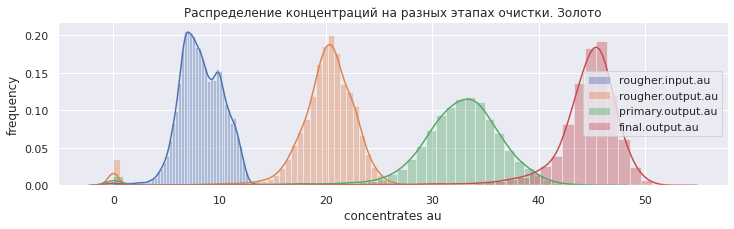

In [29]:
#concentrates['rougher.input.feed_au'].plot(kind = 'hist', bins=25, alpha=0.5)
tit_con = 'Распределение концентраций на разных этапах очистки. '
plt.figure(figsize=(12,3))
plt.title(tit_con + 'Золото')
sns.distplot(concentrates['rougher.input.feed_au'], label='rougher.input.au')
sns.distplot(concentrates['rougher.output.concentrate_au'], label='rougher.output.au')
sns.distplot(concentrates['primary_cleaner.output.concentrate_au'], label='primary.output.au')
sns.distplot(concentrates['final.output.concentrate_au'], label='final.output.au')

plt.xlabel('concentrates au')
plt.ylabel('frequency')
plt.legend()
#sns.set()
plt.show()

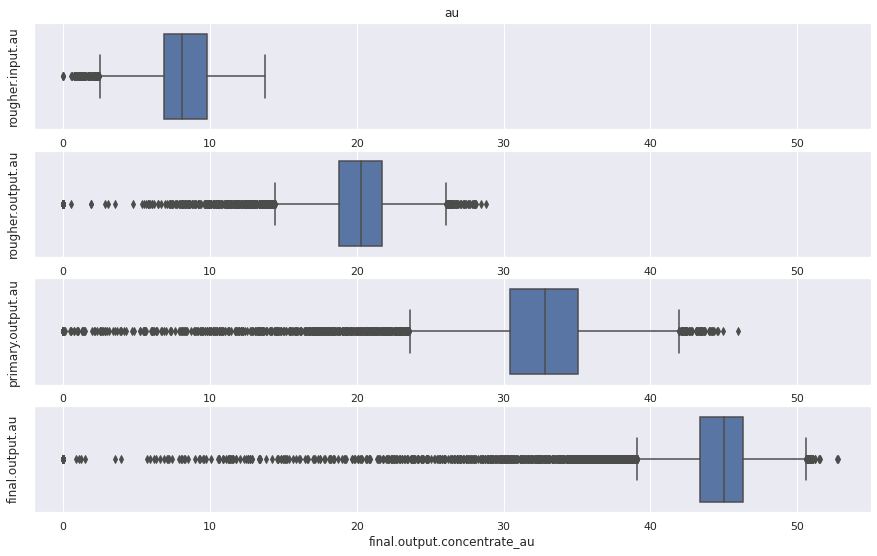

In [30]:
au = ['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',
     'final.output.concentrate_au']

def boxplot_met(met, x1, x2):
    plt.figure(figsize=(15,9))
    plt.subplot(4, 1, 1)
    plt.title(met)
    #plt.title('rougher.input.'+ met)
    sns.boxplot(concentrates['rougher.input.feed_'+met], orient="h")
    plt.ylabel('rougher.input.'+ met)
    plt.xlim(x1, x2)

    plt.subplot(4, 1, 2)
    #plt.title('rougher.output'+met)
    sns.boxplot(concentrates['rougher.output.concentrate_'+met])
    plt.ylabel('rougher.output.'+met)
    plt.xlim(x1, x2)

    plt.subplot(4, 1, 3)
    #plt.title('primary.output'+met)
    sns.boxplot(concentrates['primary_cleaner.output.concentrate_'+met])
    plt.ylabel('primary.output.'+met)
    plt.xlim(x1, x2)

    plt.subplot(4, 1, 4)
    #plt.title('final.output'+met)
    sns.boxplot(concentrates['final.output.concentrate_'+met])
    plt.ylabel('final.output.'+met)
    plt.xlim(x1, x2)
    plt.show()
    
boxplot_met('au', -2, 55)

##### В основном, концентрации золота планомерно растут от стадии к стадии. Собственно, графики распределения и боксплоты очень наглядны. 

##### Средняя концентрация золота меняется от примерно 8-9 во входящем сырье, до примерно 45 в финальном концентрате.

### Посмотрим на изменение концентрации серебра:

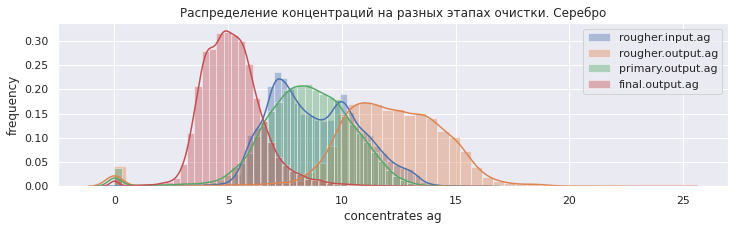

In [31]:
plt.figure(figsize=(12,3))
plt.title(tit_con + 'Серебро')
sns.distplot(concentrates['rougher.input.feed_ag'], label='rougher.input.ag')
sns.distplot(concentrates['rougher.output.concentrate_ag'], label='rougher.output.ag')
sns.distplot(concentrates['primary_cleaner.output.concentrate_ag'], label='primary.output.ag')
sns.distplot(concentrates['final.output.concentrate_ag'], label='final.output.ag')

plt.xlabel('concentrates ag')
plt.ylabel('frequency')
plt.legend()
plt.show()

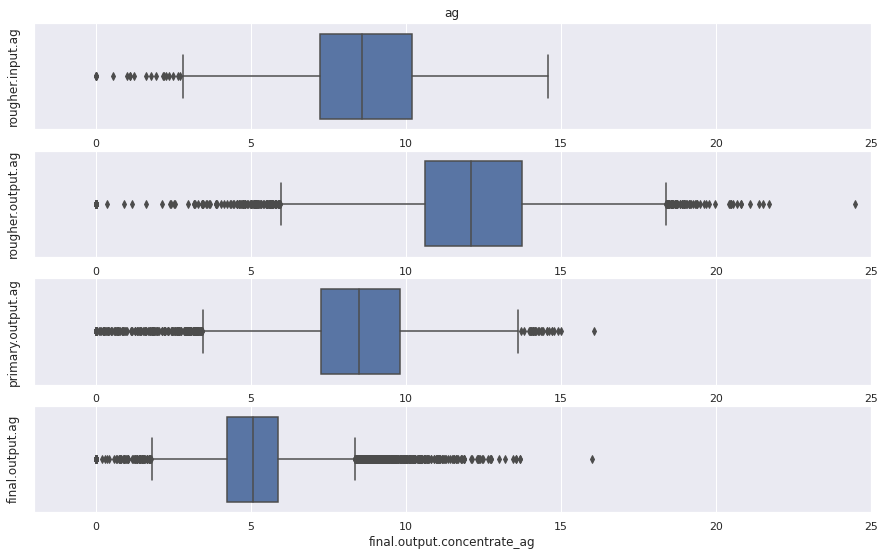

In [32]:
boxplot_met('ag', -2, 25)

##### А вот с серебром все не так красиво получается. Концентрация этого металла чуть подрастает после этапа флотации, но на последующих этапах очистки она заметно падает, и становится меньше входной концентрации. При этом изначальная концентрация серебра в сырье сравнима с концентрацией золота (примерно 8-10<единиц>)

Что ж, это очень разные металлы, с очень разными свойствами. Видимо, серебро надо извлекать другими способами. 

### Посмотрим на изменение концентрации свинца:

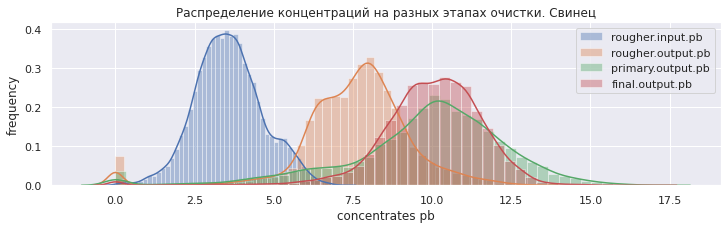

In [33]:
plt.figure(figsize=(12,3))
plt.title(tit_con + 'Свинец')
sns.distplot(concentrates['rougher.input.feed_pb'], label='rougher.input.pb')
sns.distplot(concentrates['rougher.output.concentrate_pb'], label='rougher.output.pb')
sns.distplot(concentrates['primary_cleaner.output.concentrate_pb'], label='primary.output.pb')
sns.distplot(concentrates['final.output.concentrate_pb'], label='final.output.pb')

plt.xlabel('concentrates pb')
plt.ylabel('frequency')
plt.legend()
plt.show()

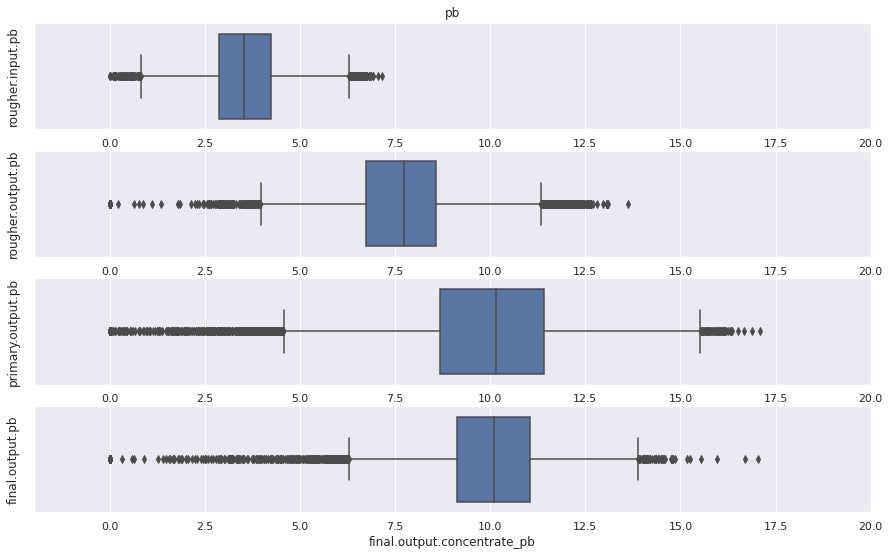

In [34]:
boxplot_met('pb', -2, 20)

##### Изначальная концентрация свинца в сырье заметно ниже, чем концентрация золота или серебра (примерно 3 против 8-10 у золота). Концентрация свинца немного увеличивается после флотации. Потом еще немного подрастает после первой доочистки, и после второй доочистки остается на том же уровне.

#### Посмотрим на временные ряды извлечения концентратов
(просто так)

Строго говоря, по оси х у нас не совсем время, но наши индексы все равно соответствуют времени.\
(Смотреть будем только на кусочки записей, ибо полная длина слишком велика.)

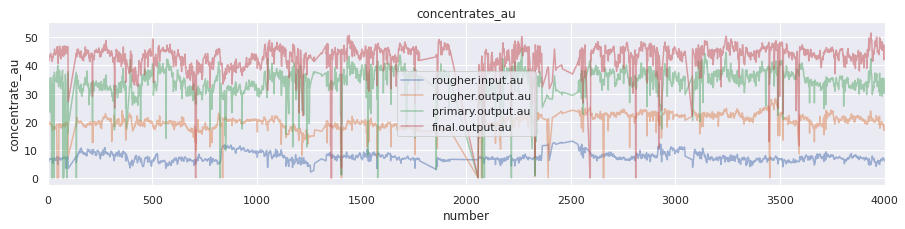

In [35]:
def concentrat_au(x1, x2):
    plt.xlabel('number')
    plt.ylabel('concentrate_au')
    #plt.ylim(-10, 60)
    plt.xlim(x1, x2)
    plt.plot(full.index, full['rougher.input.feed_au'], label='rougher.input.au', alpha=0.5)
    plt.plot(full.index, full['rougher.output.concentrate_au'], label='rougher.output.au', alpha=0.5)
    plt.plot(full.index, full['primary_cleaner.output.concentrate_au'], label='primary.output.au', alpha=0.5)
    plt.plot(full.index, full['final.output.concentrate_au'], label='final.output.au', alpha=0.5)
    
def plot_me_times(f_concentrat, title):
    plt.figure(figsize=(15,3))
    plt.title(title)
    f_concentrat(0, 4000)
    plt.legend()
    plt.show()
    
plot_me_times(concentrat_au, 'concentrates_au')

Мы не обновляли индексы после удаления пропусков. Поэтому некоторые кусочки временного ряда с пропусками имеют немного странные треугольные выбросы :).

Также наблюдается некоторая синхронность в поведении кривых (нет сдвига по времени особенностей кривых друг относительно друга). Это подтверждает, что к одной строке (к одному времени) относится все стадии одной партии породы \
_(интересно, как это отслеживается, потому что кажется, что судя по характеру столбца date в файлах данных, процесс обогащения идет непрерывно)_

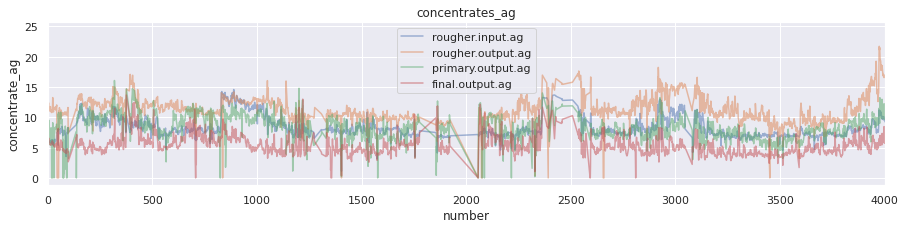

In [36]:
def concentrat_ag(x1, x2):
    plt.xlabel('number')
    plt.ylabel('concentrate_ag')
    #plt.ylim(-1, 25)
    plt.xlim(x1, x2)
    plt.plot(full.index, full['rougher.input.feed_ag'], label='rougher.input.ag', alpha=0.5)
    plt.plot(full.index, full['rougher.output.concentrate_ag'], label='rougher.output.ag', alpha=0.5)
    plt.plot(full.index, full['primary_cleaner.output.concentrate_ag'], label='primary.output.ag', alpha=0.5)
    plt.plot(full.index, full['final.output.concentrate_ag'], label='final.output.ag', alpha=0.5)

plot_me_times(concentrat_ag, 'concentrates_ag')

Серебро ведет себя более запутанно и менее логично.

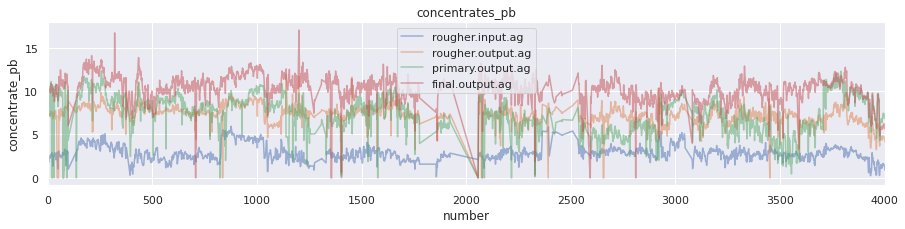

In [37]:
def concentrat_pb(x1, x2):
    plt.xlabel('number')
    plt.ylabel('concentrate_pb')
    #plt.ylim(-10, 30)
    plt.xlim(x1, x2)
    plt.plot(full.index, full['rougher.input.feed_pb'], label='rougher.input.ag', alpha=0.5)
    plt.plot(full.index, full['rougher.output.concentrate_pb'], label='rougher.output.ag', alpha=0.5)
    plt.plot(full.index, full['primary_cleaner.output.concentrate_pb'], label='primary.output.ag', alpha=0.5)
    plt.plot(full.index, full['final.output.concentrate_pb'], label='final.output.ag', alpha=0.5)
    
plot_me_times(concentrat_pb, 'concentrates_pb')

#### Посмотрим на финальные концентрации металлов:

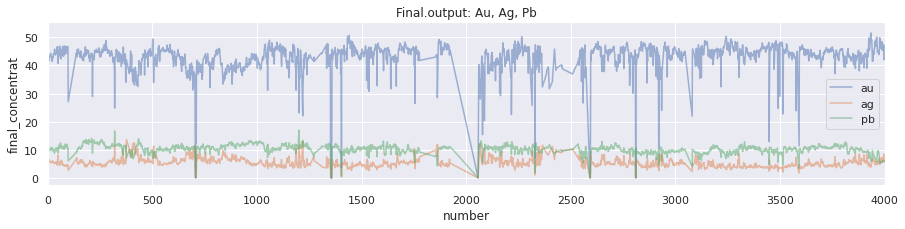

In [38]:
def concentrat_final(x1, x2):
    plt.xlabel('number')
    plt.ylabel('final_concentrat')
    #plt.ylim(-10, 30)
    plt.xlim(x1, x2)
    plt.plot(full.index, full['final.output.concentrate_au'], label='au', alpha=0.5)
    plt.plot(full.index, full['final.output.concentrate_ag'], label='ag', alpha=0.5)
    plt.plot(full.index, full['final.output.concentrate_pb'], label='pb', alpha=0.5)
    #plt.plot(train.index, train['final.output.concentrate_sol'], alpha=0.5)
    
plot_me_times(concentrat_final, 'Final.output: Au, Ag, Pb')

[В оглавление](#content)

<a id="step2_2"> </a>
## 2.2. Сравнение размера гранул на обучающей и тестовой выборках

In [39]:
test.head(3)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


#### Размеры гранул входного сырья.

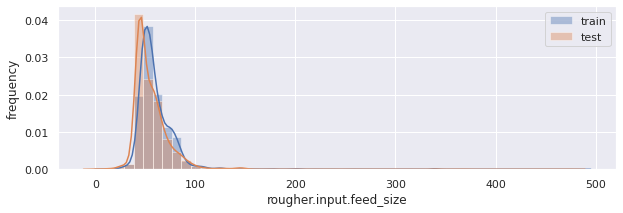

In [40]:
ri_sz = 'rougher.input.feed_size'
plt.figure(figsize=(10,3))
sns.distplot(train[ri_sz], label='train')
sns.distplot(test[ri_sz], label='test')
plt.xlabel(ri_sz)
plt.ylabel('frequency')
plt.legend()

plt.show()

Во входящем сырье распределения размеров гранул примерно похожи в тестовой и тренировочной выборках. Немного разная форма распределения - тестовые данные более скошенные.

Посмотрим еще на боксплоты:

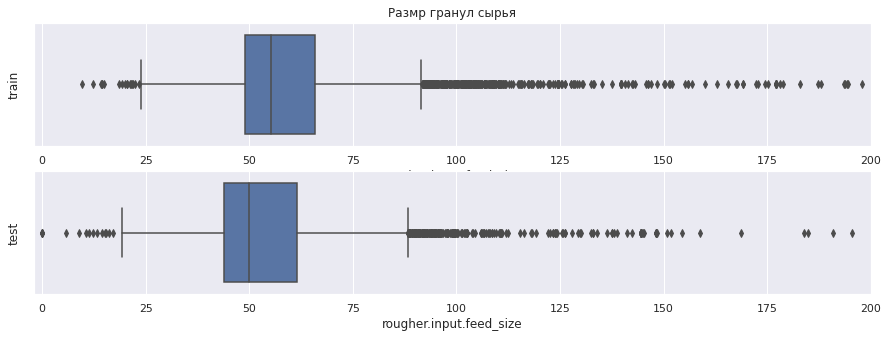

In [41]:
def boxplot_size(stade, x1, x2):
    plt.figure(figsize=(15,5))
    plt.subplot(2, 1, 1)
    plt.title('Размр гранул сырья')
    sns.boxplot(train[stade], orient="h")
    plt.ylabel('train')
    plt.xlim(x1, x2)

    plt.subplot(2, 1, 2)
    sns.boxplot(test[stade])
    plt.ylabel('test')
    plt.xlim(x1, x2)
    plt.show()

boxplot_size(ri_sz, -2, 200)

По боксплотам лучше видно смещение распределения размеров зёрен в тестовой выборке влево. 
Немного неприятно - хотелось бы лучшего совпадения. 

#### Размеры гранул после флотации.

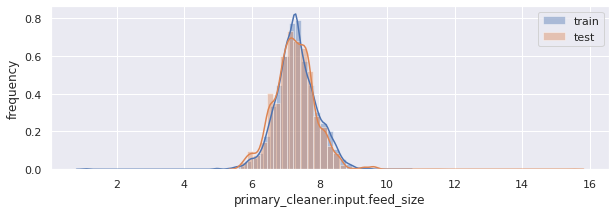

In [42]:
pi_sz = 'primary_cleaner.input.feed_size'
plt.figure(figsize=(10,3))
sns.distplot(train[pi_sz], label='train')
sns.distplot(test[pi_sz], label='test')
plt.xlabel(pi_sz)
plt.ylabel('frequency')
plt.legend()

plt.show()

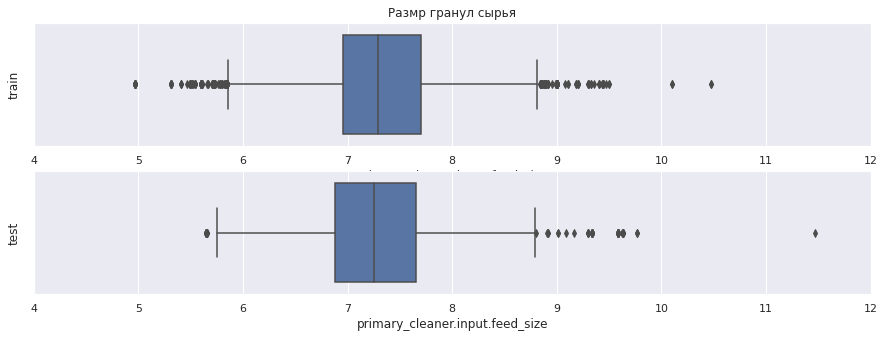

In [43]:
boxplot_size(pi_sz, 4, 12)

Флотация существенно уменьшила размеры зёрен и выровняла распределения.

[В оглавление](#content)

<a id="step2_3"> </a>
## 2.3. Исследование суммарной концентрации всех веществ на разных стадиях
            

#### посчитаем суммрные концентрации металлов

In [44]:
#Вспомним имена переменных:
#metals = ['ag', 'pb', 'au']
#phases_2 = ['final.output.concentrate_',
#         'primary_cleaner.output.concentrate_',
#         'rougher.input.feed_', 
#         'rougher.output.concentrate_']
ri_f = 'rougher.input.feed_'
ro_c = 'rougher.output.concentrate_'
po_c = 'primary_cleaner.output.concentrate_'
fo_c = 'final.output.concentrate_'

full[ri_f+'me'] = full[ri_f+'au'] + full[ri_f+'ag'] + full[ri_f+'pb']
full[ro_c+'me'] = full[ro_c+'au'] + full[ro_c+'ag'] + full[ro_c+'pb'] 
full[po_c+'me'] = full[po_c+'au'] + full[po_c+'ag'] + full[po_c+'pb'] 
full[fo_c+'me'] = full[fo_c+'au'] + full[fo_c+'ag'] + full[fo_c+'pb'] 

display(full.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.concentrate_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,primary_cleaner.output.tail_au,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.concentrate_au,rougher.output.recovery,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,rougher.output.tail_au,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,secondary_cleaner.output.tail_au,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.input.feed_me,rougher.output.concentrate_me,primary_cleaner.output.concentrate_me,final.output.concentrate_me
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,10.128295,7.25,0.988759,8.547551,10.389648,19.529297,34.174427,14.936526,2.534912,7.476074,2.106679,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,41885.707031,3481.779053,3520.337158,2.838687,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,11.500771,7.101074,28.029297,19.793808,87.107763,5.008018,0.508728,19.154297,1.170244,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,14.500184,4.694824,8.764648,2.606185,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980,14.871440,38.395653,53.111627,58.137

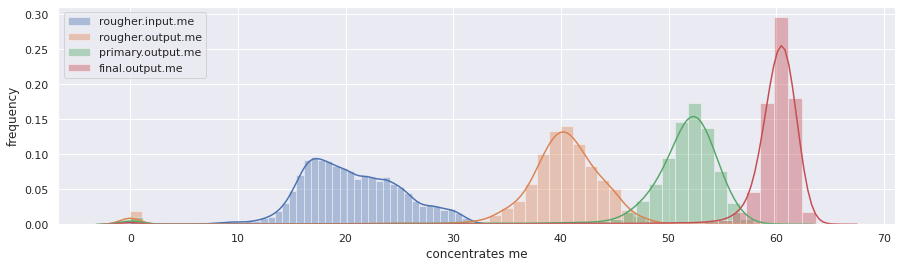

In [45]:
plt.figure(figsize=(15,4))
sns.distplot(full[ri_f+'me'], label='rougher.input.me')
sns.distplot(full[ro_c+'me'], label='rougher.output.me')
sns.distplot(full[po_c+'me'], label='primary.output.me')
sns.distplot(full[fo_c+'me'], label='final.output.me')

plt.xlabel('concentrates me')
plt.ylabel('frequency')
plt.legend()
plt.show()

##### На графиках распределений виден горбик в нулевых значениях концентраций. 
##### Проведем проверку на нули:

In [46]:
#concentrates['rougher.input.feed_me']
display(full[full[ri_f+'me'] < 0.1].shape)
display(full[full[ro_c+'me'] < 0.1].shape)
#display(full[full[po_c+'me'] < 0.1].shape)
display(full[full[fo_c+'me'] < 0.1].shape)
#display(test[test['rougher.input.feed_au'] <= 0.01].head(8))


(5, 91)

(399, 91)

(99, 91)

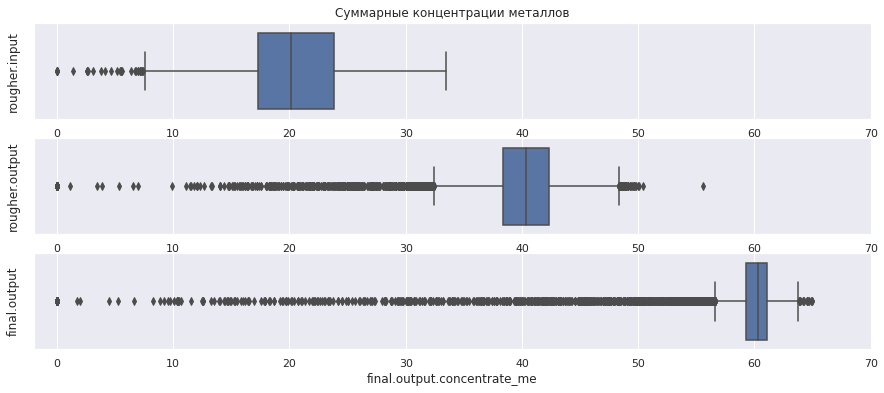

In [47]:
def boxplot_sum_me(df):
    plt.figure(figsize=(15,6))
    plt.subplot(3, 1, 1)
    plt.title('Суммарные концентрации металлов')
    sns.boxplot(df['rougher.input.feed_me'], orient="h")
    plt.xlim(-2, 70)
    plt.ylabel('rougher.input')

    plt.subplot(3, 1, 2)
    sns.boxplot(df['rougher.output.concentrate_me'])
    plt.xlim(-2, 70)
    plt.ylabel('rougher.output')

    plt.subplot(3, 1, 3)
    sns.boxplot(df['final.output.concentrate_me'])
    plt.xlim(-2, 70)
    plt.ylabel('final.output')
    plt.show()
    
boxplot_sum_me(full)

In [48]:
display(full[full[ri_f+'me'] < 7].shape)
display(full[full[ro_c+'me'] <= 12].shape)
display(full[full[ro_c+'me'] > 50].shape)
display(full[full[fo_c+'me'] <= 10].shape)


(22, 91)

(410, 91)

(3, 91)

(109, 91)

В суммарных концентрациях металлов по стадиям обработки замтны следующие явления:
1) Выбросы в нуле. Ранее мы видели в данных строчки, в которых на входе и выходе процесса обработки породы были нулевые концентрации. И большую часть таких строчек мы удалили. Но, видимо, не все. Осталось 5 строчек с почти нулевой концентрацией на входе. 

2) На выходе из этапов обработки при этом у нас нулевых концентраций значительно больше. То есть вышло из обогащения меньше, чем вошло. Таких строчек у нас 399 - после флотации и 99 - в финале. Это странная ситуация. Особенно странно, когда до флотации не ноль, после флотации ноль, и в финале снова не ноль. Такая ситуация похожа на брак, или на какие-то процессы не связанные непосредственно с обогащением породы (например, промывка установок или какое-то тестирование). Скорее всего, 399 строчек с нулевыми концентрациями после флотации необходимо удалить. 

3) В распределениях концентраций есть длинные и тяжелые хвосты слева. Хвосты - это плохо. Они искажают численные представления о распределении. Но с другой стороны, у нас нет никакой информации о том, за какие концентрации мы боремся. 10 <единиц> - это много или мало? Но глядя на боксплоты, я бы удалила строчки, в которых концентрация после флотации меньше 10 <единиц> - они действительно выглядят выбросами. Таких строчек у нас 406. 

4) Есть еще выброс в концентрации после флотации в правую сторону в районе 55 - он выглядет очевидным.

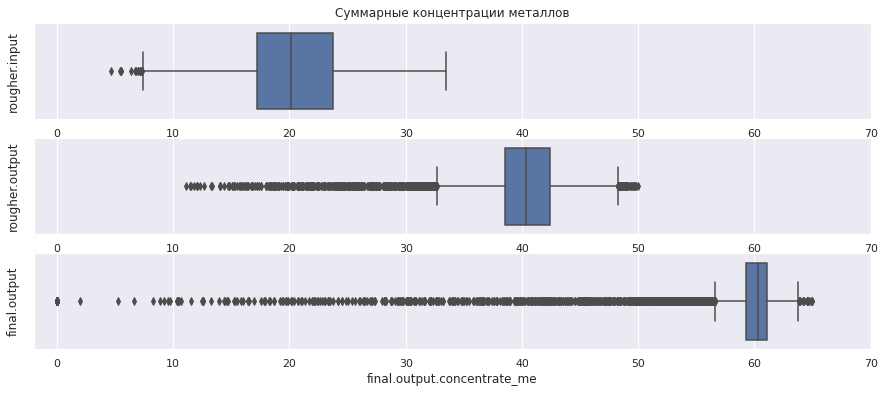

(103, 91)

In [49]:
full_drop = full.loc[(full[ro_c+'me'] > 10) & 
                     (full[ro_c+'me'] <=50)]
#full_drop.head()
boxplot_sum_me(full_drop)

display(full_drop[full_drop[fo_c+'me'] <= 10].shape)

Однако, левые выбросы финальных концентраций не удалились вместе флотационными околонулевыми концентрациями.\
Исправим. Ведь ситуация, когда после флотации стало меньше, чем до флотации мы посчитали аномальными.

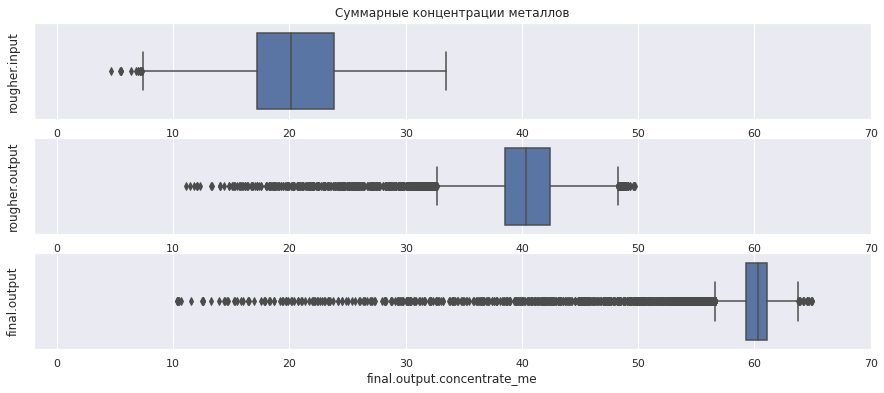

In [50]:
full_drop = full_drop.loc[(full[fo_c+'me'] > 10)]
#full_drop.head()
boxplot_sum_me(full_drop)

- Итак, мы удалили 516 хвостатых строчек. Это примерно 2.27% от полных данных.
- Удаленные пропуски при этом составили (22716 - 19439) = 3277 строк - это 14.43%
- Итого, мы после удаления пропусков и аномалий потеряли 16.7% данных. Это грустно. \
Но чтобы сильно не грустить, вспомним, как выглядели многие удаленные строчки - они состояли почти полностью из нулей и Nan.

Согласно статистическому подходу, мы спокойно могли удалять в финальном концентрате все данные, для которых суммарная концентрация оказалась меньше 50. \
Но удалять реальные данные всегда страшно. Тем более такой красивый длинный плавный хвост - он буквально кричит о том, что он не просто так...\
Поэтому мы остановились только на удалении нулей. Но здесь тоже надо было принять волевое решение - где граница этих нулей. Потому что оказалось, что в наших данных некоторые нули - это не совсем нули. По пустым строкам, которые мы видели при подготовке данных, было видно, что концентрации 0.01 - это нули. По-хорошему, надо было посмотреть также на строки с концентрациями 0.1, 1 - возможно, это помогло бы нам чуть аккуратнее принять решение.
    
Наверное, если бы позволяло бы время, стоило бы "поиграть" с разными удалениями выбросов и посмотреть, как будут меняться предсказания модели... А также попытаться понять, с чем могут быть связаны такие красивые хвосты в концентрациях.



#### Теперь нам необходимо соотнести наши почищенные данные с обучающей и тестовой выборкой, и подготовить датасеты к моделированию.

##### 1) Сопоставить оставшиеся строчки в тренировочной выборке с оставшимися в полной выборке.
То есть из тренировочной выборки надо удалить то, что не совпадает с полной выборкой.

С тестовой выборкой поступить подобно.


In [51]:
train_finish = train[train.index.isin(full_drop.index)]
test_finish = test[test.index.isin(full_drop.index)]

print(train_finish.shape)
print(test_finish.shape)

(12904, 55)
(4835, 53)


Ой. В тренировочной выборке осталось 12904 строки - как-то маловато. В тренировочной выборке до последней процедуры оставалось 14149 строк (то есть потерялось 1245 строк!). Аномалий удалили мы 516. Значит, в наших полных данных как-то по-другому удалились пропуски в целевых признаках...

[посмотреть на последнюю сводную инфо-таблицу после борьбы со всеми пропусками](#info_drop)

Но есть еще вероятность, что могли как-то съехать индексы. Попробуем удалить несовпадающие строки не по индексам, а по датам - по-идее, это более надежная привязка.

In [52]:
train_finish = train[train['date'].isin(full_drop['date'])]
train_finish.shape

(13776, 55)

Кажется, так получше. По крайней мере, это лучше соотносится c последовательными результатами наших удалений пропусков и аномалий.

In [53]:
test_finish = test[test['date'].isin(full_drop['date'])]
test_finish.shape

(5151, 53)

train: 14149 - 13776 = 373\
test: 5840 - 5151 = 689\
sum: 689 + 373 = 1062

Тоже многовато удалилось (в два раза больше, чем мы удалили аномалий в полной выборке). Но это точно лучше, чем то, что получилось по индексам.

Можно обратить внимание, что больше строчек удалилось именно в тестовой выборке. Из этого можно предположить, что помимо аномальных хвостов, сейчас из тестовой выборки удалились и пропуски в целевых признакх, которые мы не видели ранее, потому что в тестовой выборке просто отсутствовали эти столбцы.

##### 2) К тестовой выборке добавить таргеты, чтобы мы могли проверить потом на ней нашу модель.

In [54]:
target_list = ['date', 'rougher.output.recovery', 'final.output.recovery']
target_full = full_drop[target_list]
display(target_full.head())
print(target_full.info())
#test_finish[target_list] = full_drop.loc[test_finish['date'], target_list]

,date,rougher.output.recovery,final.output.recovery
0,2016-01-15 00:00:00,87.107763,70.541216
1,2016-01-15 01:00:00,86.843261,69.266198
2,2016-01-15 02:00:00,86.842308,68.116445
3,2016-01-15 03:00:00,87.226430,68.347543
4,2016-01-15 04:00:00,86.688794,66.927016


<class 'pandas.core.frame.DataFrame'>
Int64Index: 18927 entries, 0 to 22715
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     18927 non-null  datetime64[ns]
 1   rougher.output.recovery  18927 non-null  float64       
 2   final.output.recovery    18927 non-null  float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 591.5 KB
None


In [55]:
# Добавлять признаки будем по дате, а не по индексу!
test_targ = test_finish.merge(target_full, on='date', how='left')
display(test_targ.head())
print(test_targ.info())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,1401.065165,-501.038738,12.400507,5.114758,476.618130,59.865919,41.060195,12.181597,16.532144,5.801935,16.5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5151 entries, 0 to 5150
Data columns (total 55 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   date                                        5151 non-null   datetime64[ns]
 1   primary_cleaner.input.sulfate               5151 non-null   float64       
 2   primary_cleaner.input.depressant            5151 non-null   float64       
 3   primary_cleaner.input.feed_size             5151 non-null   float64       
 4   primary_cleaner.input.xanthate              5151 non-null   float64       
 5   primary_cleaner.state.floatbank8_a_air      5151 non-null   float64       
 6   primary_cleaner.state.floatbank8_a_level    5151 non-null   float64       
 7   primary_cleaner.state.floatbank8_b_air      5151 non-null   float64       
 8   primary_cleaner.state.floatbank8_b_level    5151 non-null   float64       
 9   primary_

Добавились целевые признаки, количество строк в тестовой выборке не изменилось, пропусков не появилось. Вроде бы все хорошо.

#### сделаем train и test выборки с features и targets

In [56]:
#x_test = test_targ.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)
x_test = test_targ.drop(target_list, axis=1)
y1_test = test_targ['rougher.output.recovery']
y2_test = test_targ['final.output.recovery']

x_train = train_finish.drop(target_list, axis=1)
y1_train = train_finish['rougher.output.recovery']
y2_train = train_finish['final.output.recovery']

#Проверим, что получилось:
display(x_test.head(3))
display(x_test.shape)
display(y1_test.head(3))
display(y1_test.shape)
display(y2_test.head(3))
display(y2_test.shape)

display(x_train.head(3))
display(x_train.shape)
display(y1_train.head(3))
display(y1_train.shape)
display(y2_train.head(3))
display(y2_train.shape)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,1399.001695,-499.485144,13.128569,5.636710,489.793655,62.710452,42.022440,12.084103,16.922877,6.153479,16.867518,6.150709,1001.849317,-350.301265,1249.738612,-399.107531,1249.750520,-399.396730,1198.287855,-399.488594,999.472250,-399.530962,949.566189,-398.180807,24.938200,-500.490963,14.947607,-500.013837,20.018166,-450.395995,13.987058,-449.831513,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,1399.508091,-500.416324,13.036280,5.526065,490.104534,61.961163,41.187903,11.918977,17.002532,5.999043,16.996063,6.002315,998.690785,-350.425704,1248.395457,-399.946025,1249.514451,-399.630810,1200.506459,-399.942434,1000.002114,-399.491528,950.200009,-405.787514,24.923466,-499.813963,14.930873,-500.764452,19.988503,-450.114024,14.092981,-450.059163,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,1399.497088,-499.715479,13.138412,5.426561,489.617969,66.903807,42.546294,12.091332,16.992520,5.850632,16.982096,5.853594,998.516720,-349.783538,1247.440748,-400.264330,1248.207204,-401.074405,1199.770026,-400.790582,999.925519,-399.236999,950.320481,-400.864340,24.908732,-500.304035,14.996511,-500.993821,20.039689,-450.263164,14.077881,-449.660997,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


(5151, 52)

0    89.993421
1    88.089657
2    88.412756
Name: rougher.output.recovery, dtype: float64

(5151,)

0    70.273583
1    68.910432
2    68.143213
Name: final.output.recovery, dtype: float64

(5151,)

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,127.092003,10.128295,7.25,0.988759,1549.775757,-498.912140,1551.434204,-516.403442,1549.873901,-498.666595,1554.367432,-493.428131,6.100378,2.284912,523.546326,55.486599,36.808594,6.486150,11.986616,6.007990,11.836743,6.005818,999.706909,-404.066986,1603.011353,-434.715027,1602.375000,-442.204468,1598.937256,-451.294128,1404.472046,-455.462982,1416.354980,-451.939636,25.853109,-498.526489,23.893660,-501.406281,23.961798,-495.262817,21.940409,-499.340973,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,125.629232,10.296251,7.25,1.002663,1576.166671,-500.904965,1575.950626,-499.865889,1575.994189,-499.315107,1574.479259,-498.931665,6.161113,2.266033,525.290581,57.278666,35.753385,6.478583,11.971193,6.005766,11.996163,6.012594,1000.286398,-400.065196,1600.754587,-449.953435,1600.479580,-449.830646,1600.527589,-449.953649,1399.227084,-450.869848,1399.719514,-450.119001,25.880539,-499.989656,23.889530,-500.372428,23.970550,-500.085473,22.085714,-499.446897,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,123.819808,11.316280,7.25,0.991265,1601.556163,-499.997791,1600.386685,-500.607762,1602.003542,-500.870069,1599.541515,-499.827444,6.116455,2.159622,530.026610,57.510649,35.971630,6.362222,11.920603,6.197377,11.920305,6.204633,999.719565,-400.074028,1599.337330,-450.008530,1599.672797,-449.954491,1599.849325,-449.954185,1399.180945,-449.937588,1400.316682,-450.527147,26.005245,-499.929616,23.886657,-499.951928,23.913535,-499.442343,23.957717,-499.901982,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


(13776, 52)

0    87.107763
1    86.843261
2    86.842308
Name: rougher.output.recovery, dtype: float64

(13776,)

0    70.541216
1    69.266198
2    68.116445
Name: final.output.recovery, dtype: float64

(13776,)

In [57]:
features_col = x_train.columns
print(features_col)

Index(['primary_cleaner.input.sulfate', 'primary_cleaner.input.depressant',
       'primary_cleaner.input.feed_size', 'primary_cleaner.input.xanthate',
       'primary_cleaner.state.floatbank8_a_air',
       'primary_cleaner.state.floatbank8_a_level',
       'primary_cleaner.state.floatbank8_b_air',
       'primary_cleaner.state.floatbank8_b_level',
       'primary_cleaner.state.floatbank8_c_air',
       'primary_cleaner.state.floatbank8_c_level',
       'primary_cleaner.state.floatbank8_d_air',
       'primary_cleaner.state.floatbank8_d_level', 'rougher.input.feed_ag',
       'rougher.input.feed_pb', 'rougher.input.feed_rate',
       'rougher.input.feed_size', 'rougher.input.feed_sol',
       'rougher.input.feed_au', 'rougher.input.floatbank10_sulfate',
       'rougher.input.floatbank10_xanthate',
       'rougher.input.floatbank11_sulfate',
       'rougher.input.floatbank11_xanthate', 'rougher.state.floatbank10_a_air',
       'rougher.state.floatbank10_a_level', 'rougher.state.floatba

#### Отмасштабируем признаки

In [58]:
#features_col = x_train.columns
scaler = StandardScaler()
scaler.fit(x_train[features_col])
x_train[features_col] = scaler.transform(x_train[features_col])
x_test[features_col] = scaler.transform(x_test[features_col])

display(x_train.head(3))
display(x_test.head(3))


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.168847,0.377963,-0.119677,0.280298,-0.447201,-0.287854,-0.429804,-0.810569,-0.434646,-0.260774,0.050890,-0.218914,-1.319009,-1.120387,0.467544,-0.206651,0.098075,-0.719830,0.087436,0.122129,0.133811,0.145913,-0.733197,-0.356212,1.537174,0.512607,1.415296,0.407132,1.844070,0.252562,1.703378,0.164978,2.159095,0.223093,-0.669031,0.056213,-0.172806,0.030894,-0.940746,-0.315490,-0.148612,-0.253681,-1.054832,-0.473148,-0.649256,-0.754140,-1.184279,-0.379781,-0.870176,-0.428812,-0.961937,-2.676787
1,-0.206100,0.427750,-0.119677,0.317253,-0.242813,-0.343212,-0.243867,-0.322196,-0.240990,-0.278917,0.122679,-0.337696,-1.286651,-1.137755,0.484441,-0.129028,-0.118691,-0.723794,0.082677,0.120097,0.176784,0.151432,-0.729759,-0.313769,1.524777,0.246918,1.406359,0.270511,1.851680,0.276650,1.675282,0.246212,2.064276,0.255283,-0.664300,0.031790,-0.173493,0.047418,-0.939194,-0.403829,-0.119537,-0.256201,-1.059146,-0.532615,-0.677606,-0.696350,-1.164787,-0.428518,-0.886595,-0.431667,-0.988650,-2.513190
2,-0.252181,0.730114,-0.119677,0.286960,-0.046181,-0.318012,-0.058539,-0.344104,-0.048157,-0.322420,0.212138,-0.357030,-1.310444,-1.235650,0.530320,-0.118980,-0.073858,-0.784760,0.067066,0.295125,0.156336,0.307850,-0.733122,-0.313863,1.516992,0.245958,1.402555,0.268292,1.848434,0.276641,1.675035,0.262701,2.067679,0.248067,-0.642791,0.032793,-0.173971,0.054139,-0.949299,-0.392048,0.255040,-0.267026,-1.055152,-0.473797,-0.684770,-0.692967,-1.159354,-0.427448,-0.881557,-0.430009,-0.983358,-2.557507


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.feed_sol,rougher.input.feed_au,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,1.962994,1.820028,1.22682,0.323520,-1.615047,-0.324340,-1.584793,-0.323786,-1.545046,-0.317784,-0.503685,-0.349642,2.425451,1.963161,0.140572,0.106249,1.169129,2.213138,1.610631,0.255027,1.489920,0.263928,-0.720488,0.214030,-0.403413,1.133440,-0.247317,1.174021,-0.072911,1.183523,-0.466125,1.154200,-0.501517,1.173585,-0.826830,0.023423,-1.661926,0.053149,-1.639681,0.506354,-1.740031,0.923974,-1.404982,-0.380610,-1.424121,-0.695626,-1.523812,1.349592,-1.425002,-0.417680,1.230188,0.190862
1,2.079929,1.818354,1.22682,0.284844,-1.616622,-0.319669,-1.593056,-0.319606,-1.574346,-0.276820,-0.501878,-0.369739,2.376281,1.861371,0.143583,0.073793,0.997694,2.126622,1.635210,0.113957,1.524571,0.143059,-0.739225,0.212710,-0.410791,1.118821,-0.248430,1.169827,-0.062295,1.175367,-0.463287,1.154898,-0.497904,1.039093,-0.829371,0.034723,-1.664711,0.041152,-1.644939,0.511519,-1.718836,0.918559,-1.398906,-0.398358,-1.402427,-0.667368,-1.521803,-1.101209,-1.423905,-0.420888,0.935808,0.187889
2,2.076554,1.195105,0.75095,0.299658,-1.618824,-0.342196,-1.586951,-0.319203,-1.560076,-0.358271,-0.501917,-0.354613,2.430695,1.769830,0.138870,0.287883,1.276741,2.216925,1.632121,-0.021610,1.520806,0.021925,-0.740258,0.219521,-0.416035,1.113271,-0.254594,1.143966,-0.065819,1.160126,-0.463697,1.159399,-0.497218,1.126138,-0.831912,0.026543,-1.653785,0.037487,-1.635867,0.508787,-1.721857,0.928030,-1.415731,-0.399772,-1.408895,-0.687742,-1.502454,-0.445072,-1.419360,-0.412316,0.931429,0.166189


### Вывод.

1) Мы удалили оставшиеся аномалии.

2) Прикрутили к тестовой модели целевые признаки `rougher.output.recovery` и `final.output.recovery`

3) Разбили обучающую и тестовую выборки на `features` и `target` (по 2 `target` на каждую выборку - флотационная recovery и финальная recovery)

4) Отмасштабировали признаки.

[В оглавление](#content)

<a id="step3"> </a>
# 3. Модель

    - 3.1. Функция для вычисления sMAPE
    - 3.2. Обучение моделей
    - 3.3. Выбор лучшей модели и проверка её на тестовой выборке


<a id="step3_1"> </a>
## 3.1. Функция для вычисления sMAPE

[В оглавление](#content)

[В загрузку библиотек](#input)

### Напишем функцию для вычисления метрики кчества sMAPE.
(Здесь остались закомментированные варианты кода. Это разные попытки релизации функции - процесс был непростым. Пусть пок побудут здесь).

In [59]:
rstate = RandomState(12345)

In [60]:
#def smape(y, pred_y):
#    smape = 0
#    var = 0
#    variation = pd.DataFrame({'true_y':y, 'pred_y':pred_y})
#    variation['var'] = ((abs(variation['true_y'] - variation['pred_y']) * 100) / 
#                        ((abs(variation['true_y']) + abs(variation['pred_y'])) / 2))
#    smape = variation['var'].sum() / variation.shape[0]
#    return smape    

In [61]:
#def smape(y, pred_y):
#    smape = 0
#    for i in range(y.shape[0]):
#        var = 0
#        var = (abs(y[i] - pred_y[i]) * 100) / ((abs(y[i]) + abs(pred_y[i])) / 2)
#        smape += var
#    return smape / y.shape[0]
    

In [62]:
def smape(y, pred_y):
    smape = 0
    smape = ((abs(y - pred_y) * 100) / ((abs(y) + abs(pred_y)) / 2)).sum()
    return smape / len(y)


In [63]:
def smape_itog(smape_rougher, smape_final):
    smape_finish = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_finish

[В оглавление](#content)

<a id="step3_2"> </a>
## 3.2. Обучение моделей


##### вспомним, какие у нас признаки:\
x_test = test_targ.drop(target_list, axis=1)\
y1_test = test_targ('rougher.output.recovery']\
y2_test = test_targ('final.output.recovery']

x_train = train_finish.drop(target_list, axis=1)\
y1_train = train_finish('rougher.output.recovery']\
y2_train = train_finish('final.output.recovery']

Индексы при у: 1-rougher, 2-final 

### 3.2.1. rougher.output.recovery

##### Начнем с быстрой модели - с Линейной регрессии
Проверим, как меняется качетво модели в зависимости от параметра cv.

In [64]:
%%time
score_rougher = make_scorer(smape, greater_is_better=False)
def regres(x, y, cv_val):
    regression = LinearRegression()
    #score_rougher = make_scorer(smape, greater_is_better=False)
    regres_score = cross_val_score(regression, 
                              x, 
                              y, 
                              cv=cv_val,
                              scoring=score_rougher)

    print('best model Regression:')
    print(regres_score)
    print('среднее smape по кросс-валидации:', regres_score.mean())
    print()

print('cv=5:')
regres(x_train, y1_train, 5)
print()
print('cv=7:')
regres(x_train, y1_train, 7)
print()
print('cv=10:')
regres(x_train, y1_train, 10)

cv=5:
best model Regression:
[-9.5205935  -7.22199803 -5.57613909 -4.72183507 -9.08432253]
среднее smape по кросс-валидации: -7.224977642098786


cv=7:
best model Regression:
[-7.59986175 -7.44350734 -4.76671365 -5.43752462 -4.72581993 -5.67033692
 -7.90794115]
среднее smape по кросс-валидации: -6.221672194921707


cv=10:
best model Regression:
[-7.19634587 -8.17247526 -6.42608727 -4.69392457 -6.25148628 -5.20784607
 -5.24768074 -3.79844281 -6.87802466 -7.75349481]
среднее smape по кросс-валидации: -6.162580833385609

CPU times: user 4.85 s, sys: 4.33 s, total: 9.19 s
Wall time: 2.75 s


##### Число блоков кросс-валидации равное 10 лучше чем равное 5 (на других моделях тоже, но, чтобы не перегружать процесс, на остальных моделях оставлена только cv=10)

##### Посмотрим, как меняется наша метрика на решающем дереве:

In [65]:
for depth in range(2, 11, 1):
    tree = DecisionTreeRegressor(random_state=rstate, max_depth=depth)
    tree_score = cross_val_score(tree, 
                              x_train, 
                              y1_train, 
                              cv=10,
                              scoring=score_rougher)
    tree_score_mean = tree_score.mean()

    print('max_depth=', depth, 'tree_smape=', tree_score_mean)

max_depth= 2 tree_smape= -7.272280181875145
max_depth= 3 tree_smape= -6.890348239297085
max_depth= 4 tree_smape= -6.865850573902276
max_depth= 5 tree_smape= -7.075957429956311
max_depth= 6 tree_smape= -7.413722746112808
max_depth= 7 tree_smape= -7.713196433599194
max_depth= 8 tree_smape= -8.150677236224292
max_depth= 9 tree_smape= -8.372594302964453
max_depth= 10 tree_smape= -8.627024576176073


##### Подберем лучшее решающее дерево с помощью `GridSearchCV`

In [66]:
%%time
def tree_regres(x, y, cv_val):
    param_tree = {'max_depth':np.arange(2, 9, 1)}
    grid_tree = GridSearchCV(DecisionTreeRegressor(random_state=rstate), 
                             param_tree, 
                             scoring=score_rougher, 
                             cv=cv_val, 
                             verbose=1)
    grid_tree.fit(x, y)
    print('best model Tree:')
    print('Параметры лучшего дерева:', grid_tree.best_params_)
    print('smape лучшего дерева:', grid_tree.best_score_)
    print()

tree_regres(x_train, y1_train, 10)

Fitting 10 folds for each of 7 candidates, totalling 70 fits
best model Tree:
Параметры лучшего дерева: {'max_depth': 4}
smape лучшего дерева: -6.865850573902276

CPU times: user 25.6 s, sys: 14.6 ms, total: 25.6 s
Wall time: 25.7 s


##### Подберем лучший случайный лес с помощью `GridSearchCV`

In [67]:
%%time
def forest_regres(x, y, cv_val):
    param_forest = {'n_estimators':range(10, 51, 20), 
                'max_depth':range(2, 9, 2)}
    grid_forest = GridSearchCV(RandomForestRegressor(random_state=rstate), 
                               param_forest, 
                               scoring=score_rougher, 
                               cv=cv_val, 
                               verbose=1)
    grid_forest.fit(x, y)
    print('best model Forest:')
    print('Параметры лучшего леса:', grid_forest.best_params_)
    print('smape лучшего леса:', grid_forest.best_score_)
    print()

forest_regres(x_train, y1_train, 10)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
best model Forest:
Параметры лучшего леса: {'max_depth': 6, 'n_estimators': 50}
smape лучшего леса: -6.439669638973564

CPU times: user 12min 40s, sys: 765 ms, total: 12min 41s
Wall time: 12min 43s


### 3.2.2. final.output.recovery

#### Линейная регрессия с разными значениями cv:

In [68]:
%%time
print('cv=5:')
regres(x_train, y2_train, 5)
print()
print('cv=7:')
regres(x_train, y2_train, 7)
print()
print('cv=10:')
regres(x_train, y2_train, 10)

cv=5:
best model Regression:
[-13.07196872  -9.23118256  -9.30431172  -9.14044505 -13.9193956 ]
среднее smape по кросс-валидации: -10.933460728717936


cv=7:
best model Regression:
[-14.25410146 -10.7727256   -8.02286443 -11.64270735  -9.48436791
  -9.09692921 -14.77406363]
среднее smape по кросс-валидации: -11.149679941399052


cv=10:
best model Regression:
[ -9.48886549 -10.6493971  -11.30728402  -7.4073077   -8.84067068
 -10.25333148 -10.41711745  -8.42288862 -10.05332457 -16.13881807]
среднее smape по кросс-валидации: -10.297900518160535

CPU times: user 4.77 s, sys: 3.93 s, total: 8.69 s
Wall time: 2.29 s


#### Подбор лучшего решающего дерева и лучшего случайного леса для `final.output.recovery`.

In [69]:
%%time
print('best model Tree:')
tree_regres(x_train, y2_train, 10)
print()
print('best model Forest:')
forest_regres(x_train, y2_train, 10)

best model Tree:
Fitting 10 folds for each of 7 candidates, totalling 70 fits
best model Tree:
Параметры лучшего дерева: {'max_depth': 2}
smape лучшего дерева: -9.340796528033332


best model Forest:
Fitting 10 folds for each of 12 candidates, totalling 120 fits
best model Forest:
Параметры лучшего леса: {'max_depth': 4, 'n_estimators': 30}
smape лучшего леса: -8.919925323157443

CPU times: user 12min 43s, sys: 752 ms, total: 12min 44s
Wall time: 12min 45s


### Вывод.
1) Для флотационной `recovery` качеcтва моделей оказались примерно близкие (в sMAPE районе -6.8...-6.1). 
    - Лучшей оказалась Линейная регрессия (с cv=10), для нее sMAPE = -6.16. Это очень приятно, так как эта модель и работает быстрее других. 
    - Также оказалось, что для этого признака (`rougher.output.recovery`) метрика sMAPE гораздо больше зависит от количества блоков кросс-валидации, чем от того, каким типом модели мы пользовались. Это скорее говорит о большой нестабильности наших предсказаний.

2) С финальной `recovery` всё оказалось хуже. 
    - В целом значения sMAPE хуже, чем для предыдущего recovery (-10... -9)
    - от значения параметра cv уже мало что зависит.
    - лучшей оказалась модель случайного леса с 'max_depth'=4, 'n_estimators'=30. Для нее sMAPE=-8.9

[В оглавление](#content)

<a id="step3_3"> </a>
## 3.3. Выбор лучшей модели и проверка её на тестовой выборке


### 3.3.1. Построим модель для `rougher.output.recovery`
##### И проверим её на тестовой выборке.

##### Это будет Линейная регрессия.

In [70]:
regres_test = LinearRegression()
regres_test.fit(x_train, y1_train)
predict_rougher = regres_test.predict(x_test)
#predict_rougher = pd.Series(predict_rougher, index=x_test.index)
smape_rougher = smape(y1_test, predict_rougher)
  
print("smape_rougher =", smape_rougher)


smape_rougher = 4.797576451927561


### 3.3.2. Построим модель для `final.output.recovery`
##### И проверим её на тестовой выборке.

##### Это будет Случайный лес с 'max_depth'=4, 'n_estimators'=30.

In [71]:
forest_test = RandomForestRegressor(n_estimators=30, max_depth=4, random_state=rstate)
forest_test.fit(x_train, y2_train)

predict_final = forest_test.predict(x_test)
smape_final = smape(y2_test, predict_final)
  
print("smape_final =", smape_final)


smape_final = 8.28915721145284


##### В целом на тестовой выборке получилось даже лучше, чем на обучающей.

#### Посмотрим на распределения recovery в target's и в предсказаниях: 

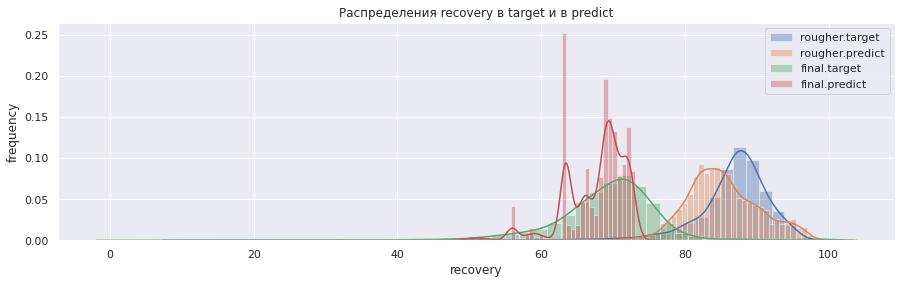

In [72]:
plt.figure(figsize=(15,4))
plt.title('Распределения recovery в target и в predict')
sns.distplot(y1_test, label='rougher.target')
sns.distplot(predict_rougher, label='rougher.predict')
sns.distplot(y2_test, label='final.target')
sns.distplot(predict_final, label='final.predict')

plt.xlabel('recovery')
plt.ylabel('frequency')
plt.legend()
plt.show()

Идеального совпадения не получилось. Но в целом, распределения для соответствующих этапов близки.

Распределение оценки recovery для чернового концентрата довольно близко к своим предсказаниям.

Предсказания финальной recovery получились хуже, с непонятным выбросом, двумодальное, рваное. Но по-крайней мере находится на положенном месте - в районе значений 65-70....


### 3.3.3. Посчитаем итоговую sMAPE:

In [73]:
smape_finish = smape_itog(smape_rougher, smape_final)
print('Итоговая sMAPE:', smape_finish)

Итоговая sMAPE: 7.416262021571521


[В оглавление](#content)

[В загрузку библиотек](#input)

<a id="step4"> </a>
# Выводы 
1) У нас были непростые данные с большим количеством пропусков и нулей, в том числе в важных признаках целевых концентраций и recovery.

2) В процессе анализа данных выяснилось, что при обогащении рассматриваемого в этой работе типа породы, нацеленном на золото, мы теряем до трети серебра в выходных концентратах (final.concentrate относительно input.feed). Зато средняя концентрация золота меняется от примерно 8-9 во входящем сырье, до примерно 45 в финальном концентрате.

3) Recovery после флотации в среднем выше, чем финальная.

4) Мы проверили три вида моделей (Линейная регрессия, Решающее дерево и Случайный лес) с разными параметрами на обучающей выборке, и выбрали лучшие из них для проверки на тестовой выборке. Для разных целевых recovery это оказались разные модели:
- для `rougher.output.recovery` это была Линейная регрессия. Для нее sMAPE = -6.16 (для cv=10)
- для `final.output.recovery` - Случайный лес с 'max_depth'=4, 'n_estimators'=30. Для нее sMAPE = -8.92 (для cv=10)

5) В целом значения sMAPE для `final.output.recovery` оказались хуже, чем для `rougher.output.recovery`.

6) Выбранные лучшие модели были проверены на тестовой выборке. Результат получился даже чуть получше:
- для `rougher.output.recovery`  sMAPE = 4.797
- для `final.output.recovery`  sMAPE = 8.289

7) Для тестовой выборки Итоговая sMAPE = 7.416





##### Cверим наши результаты с константной моделью.


In [74]:
# Константная модель для rougher.output.recovery:
const_rougher = pd.Series(y1_train.median(), index=x_test.index)
smape_const_rougher = smape(y1_test, const_rougher)
print("smape_const_rougher =", smape_const_rougher)

# Константная модель для final.output.recovery:
const_final = pd.Series(y2_train.median(), index=x_test.index)
smape_const_final = smape(y2_test, const_final)
print("smape_const_final =", smape_const_final)

smape_const_finish = smape_itog(smape_const_rougher, smape_const_final)
print('Итоговая константная sMAPE:', smape_const_finish)

smape_const_rougher = 4.782371820790527
smape_const_final = 8.173882045417573
Итоговая константная sMAPE: 7.326004489260812


Вот это да! Наши предсказания оказались не лучше, чем если бы мы просто предсказали всё медианными значениями! 

Что можно попробовать сделать для улучшения качества:
- Еще раз внимательно присмотреться к данным. Еще раз оценить выбросы, аномалии, пропуски.
- Уточнить у заказчика важность тех или иных признаков. Вдруг, среди наших полсотни признаков есть такие, которые модели только мешают...
- Поискать оптимальные факторы и признаки для построения модели. 
- Расширить поиск оптимальных моделей и их параметров
- Еще раз присмотреться к технологии процесса - возможно, есть какие-то неучтённые признаки, которые могут помочь в построении адекватной модели. 


In [75]:
end = time.time()
print((end-start1)/60)

27.13999346494675
